# Projet : analyse des impacts environnementaux des services num√©riques

# INTRODUCTION GENERALE

L'impact environnemental des services num√©riques, notamment √† travers leur empreinte carbone, constitue un enjeu majeur dans un monde de plus en plus connect√©. Ce projet vise √† analyser et mod√©liser les relations entre la consommation √©nerg√©tique, le nombre d'utilisateurs et les √©missions de CO2 des services num√©riques. √Ä l‚Äôaide de diff√©rentes techniques de machine learning, telles que la r√©gression lin√©aire, les mod√®les de classification (KNN) et les m√©thodes de clustering (K-means et CAH), nous aLLons chercher √† identifier les principaux facteurs influen√ßant ces impacts, tout en explorant la pertinence des approches appliqu√©es. Ce travail mettra en lumi√®re les d√©fis li√©s √† la qualit√© des donn√©es et √† l'ad√©quation des mod√®les, tout en offrant des perspectives pour des analyses futures plus robustes et pr√©cises.

# PARTIE 1 : GENERATION DES DONNEES ARTIFICIELLES

In [ ]:

#Cette section n'a plus besoin d'etre " run" parceque nous l'avons d√©j√† fait pour obtenir le fichicer csv.
#Nous ne ferons donc que charger notre fichier csv dans la suite du projet.

import numpy as np
import pandas as pd

np.random.seed(42)  # Pour la reproductibilit√©
# Liste des services num√©riques
services_numeriques = [
    "Streaming vid√©o", "Recherche sur internet", "R√©seaux sociaux", 
    "E-commerce", "Jeux en ligne", "Cloud computing", "Email", 
    "Stockage de fichiers", "Applications de messagerie", "Streaming audio", 
    "Webinaire", "√âducation en ligne", "Publicit√© en ligne", "T√©l√©travail", 
    "Services bancaires en ligne", "Applications de fitness", 
    "Services de r√©servation", "Services de livraison", 
    "Services de sant√© en ligne", "Applications de voyage", 
    "Plateformes de crowdfunding", "Forums en ligne", "Blogs", 
    "Podcasts", "Services de t√©l√©phonie"
]

# G√©n√©ration des donn√©es artificielles

data = {
    "Service num√©rique": services_numeriques,
    "Consommation √©nerg√©tique (kWh)": np.random.randint(1000, 90000, len(services_numeriques)),  # Entre 1 000 et 90 000 kWh
    "Nombre d'utilisateurs": np.random.randint(50000, 1000000, len(services_numeriques)),  # Entre 50 000 et 1 000 000 utilisateurs
    "Type d'√©nergie utilis√©e": np.random.choice(["Renouvelable", "Non-renouvelable"], len(services_numeriques)),
    "Pays": np.random.choice(["France", "UK", "Allemagne", "Canada"], len(services_numeriques)),
    "√âmission de CO2 (kg)": np.random.randint(100, 5000, len(services_numeriques))  # Entre 100 et 5 000 kg de CO2
}

# Cr√©ation du DataFrame
df = pd.DataFrame(data)

# Sauvegarde dans un fichier CSV
df.to_csv("services_numerica.csv", index=False)

print("Le fichier CSV a √©t√© g√©n√©r√© avec succ√®s.")



# Partie 2 :  ANALYSE DES DONNEES

# Algo 1 : R√©gression (Pr√©diction de la quantit√© de CO2 √©mise)

## INTRODUCTION

Dans un contexte o√π la transition √©nerg√©tique et la r√©duction des √©missions de CO‚ÇÇ sont au c≈ìur des pr√©occupations globales, **ce projet vise √† pr√©dire la quantit√© de CO‚ÇÇ √©mise par les services num√©riques**. **√Ä partir de donn√©es sur la consommation √©nerg√©tique totale et le nombre d'utilisateurs, nous utiliserons un mod√®le de r√©gression lin√©aire pour √©tablir une relation pr√©cise entre ces variables et les √©missions de CO‚ÇÇ**. En suivant une m√©thodologie structur√©e comprenant la pr√©paration et le nettoyage des donn√©es, ainsi que l'√©valuation du mod√®le √† l'aide de m√©triques telles que l'Erreur Quadratique Moyenne (MSE) et le Coefficient de D√©termination (R¬≤), ce projet permettra d'optimiser la compr√©hension et la gestion de l'empreinte carbone des services num√©riques.

#### M√©thode :  
Pour ce faire on va dans un premier temps utiliser la r√©gression lin√©aire simple pour :
1. Pr√©dire la quantit√© de CO2 √©mise en fonction de la consommation totale d'√©nergie en KWh
2. Pr√©dire la quantit√© de CO2 √©mise en fonction du nombre d'utilisateurs


On part donc de l'hypoth√®se que la consommation √©nerg√©tique totale a un impact sur la quantit√© de CO2 √©nerg√©tique √©mise et de la m√™me mani√®re la quantit√© de CO2 √©mise d√©penderaient du nombre d'utilisateurs 

## Importation des biblioth√®ques n√©cessaires 


In [484]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Etape 1 : Pr√©paration des donn√©es

In [487]:
# Importer le fichier CSV
import pandas as pd
data = pd.read_csv("services_numeriques.csv", index_col=0)

# Afficher les premi√®res lignes du DataFrame
print("Jeu de donn√©es :")
data.head()

Jeu de donn√©es :


Service num√©rique  Consommation √©nerg√©tique (kWh)  \
1         Streaming vid√©o                           16795   
2  Recherche sur internet                            1860   
3         R√©seaux sociaux                           77820   
4              E-commerce                           55886   
5           Jeux en ligne                            7265   

   Nombre d'utilisateurs Type d'Energie utilis√©e       Pays  \
1                 259795            Renouvelable     France   
2                 487232            Renouvelable         UK   
3                 918040            Renouvelable  Allemagne   
4                 501186            Renouvelable         UK   
5                 157730        Non-renouvelable  Allemagne   

   √âmission de CO2 (kg)  
1                   592  
2                  2162  
3                  3984  
4                   164  
5                  2668

In [497]:
# V√©rification des colonnes et nettoyage si n√©cessaire
# Supposons que les colonnes pertinentes s'appellent 'Consommation √©nerg√©tique (kWh)', 
# 'Nombre d'utilisateurs' et '√âmissions de CO2 (kg)'
data = data[['Consommation √©nerg√©tique (kWh)', 'Nombre d\'utilisateurs', '√âmission de CO2 (kg)']]
data.head()

Consommation √©nerg√©tique (kWh)  Nombre d'utilisateurs  √âmission de CO2 (kg)
1                           16795                 259795                   592
2                            1860                 487232                  2162
3                           77820                 918040                  3984
4                           55886                 501186                   164
5                            7265                 157730                  2668

Ainsi dans notre dataset nous avons maintenant que les colonnes qui sont la consommation √©nerg√©tique(variable explicative), nombre d'utilisateurs(variable explicative) et la quantit√© de CO2 √©mise(variable √† expliquer)

## Etape 2 :  Nettoyage des donn√©es 

In [594]:
print(data.describe())  
#La fonction describe nous permet d'avoir quelques statistiques sur nos donn√©es 

       Consommation √©nerg√©tique (kWh)  Nombre d'utilisateurs  \
count                       25.000000              25.000000   
mean                     50586.280000          480079.440000   
std                      28332.269924          277352.134193   
min                       1769.000000           66725.000000   
25%                      29693.000000          274538.000000   
50%                      60735.000000          487232.000000   
75%                      68969.000000          649143.000000   
max                      88498.000000          954277.000000   

       √âmission de CO2 (kg)  
count             25.000000  
mean            2621.920000  
std             1416.978914  
min              164.000000  
25%             1670.000000  
50%             2790.000000  
75%             3661.000000  
max             4975.000000  


In [505]:
data.isnull().sum()
#V√©rification des donn√©es manquantes

Consommation √©nerg√©tique (kWh)    0
Nombre d'utilisateurs             0
√âmission de CO2 (kg)              0
dtype: int64

Cette m√©thode nous indique qu'il n'y a pas de donn√©es manquantes dans notre base de donn√©es

Nous pouvons voir que notre base de donn√©es est bien fournie c'est √† dire que nous n'avons pas de donn√©es manquantes 
Donc le jeu de donn√©es est complet, sans valeurs manquantes, et les statistiques descriptives pour chaque variable le montrent 

#### Visualisation des donn√©es 
Ici nous avons calculer et afficher une matrice de corr√©lation pour avoir une id√©e sur la corr√©lation de nos donn√©es 

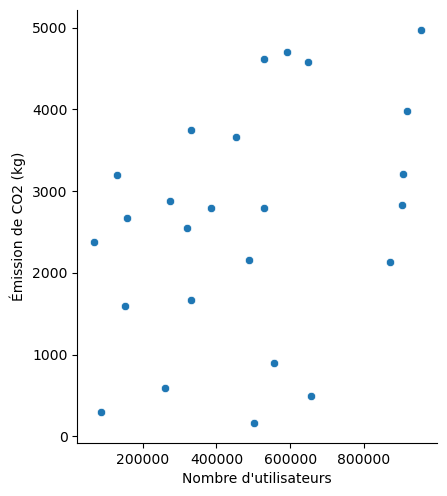

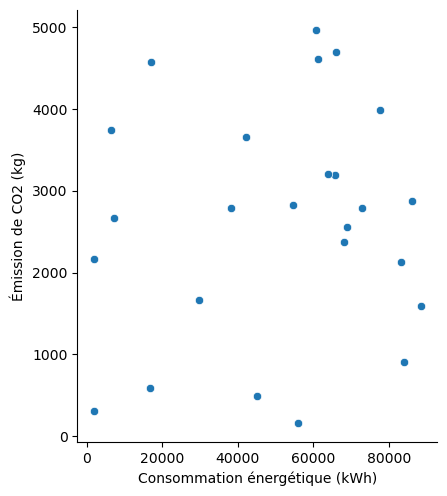

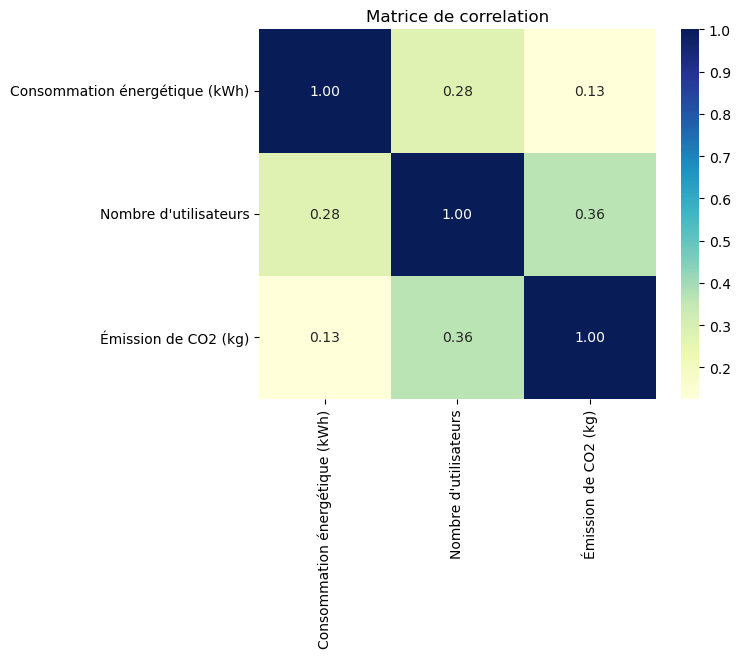

In [508]:
sns.pairplot(data, x_vars=["Nombre d'utilisateurs"], y_vars=['√âmission de CO2 (kg)'], height=5, aspect=0.9)
plt.show()

sns.pairplot(data, x_vars=["Consommation √©nerg√©tique (kWh)"], y_vars=['√âmission de CO2 (kg)'], height=5, aspect=0.9)
plt.show()
# Matrice de corr√©lation

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Matrice de correlation")
plt.show()

De cette matrice il nous ressort que la corr√©lation entre la variable explicative consommation d'√©nergie et la variable cible √©mission de CO2 est tr√®s faible. Ce qui nous fait constater que la consommation d'√©nergie n'a pas un poids significatifs sur l'√©mission de CO2 donc la relation entre ces donn√©es est faible et n'existe presque pas avec le jeu de donn√©es dont nous disposons. Cependant la relation entre le nombre d'utilisateurs et l'√©mission de CO2 est plus forte car ces deux variables sont un peu plus corr√©l√©es.

#### D√©tection des valeurs ab√©rantes 
Ce programme permettra de d√©terminer les donn√©es ab√©rantes si il y en a 

In [514]:
# Calculer les limites avec l'IQR pour chaque variable
Q1 = data.quantile(0.25)  # Premier quartile
Q3 = data.quantile(0.75)  # Troisi√®me quartile
IQR = Q3 - Q1  # √âcart interquartile

# Limites pour d√©tecter les valeurs extr√™mes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifier les valeurs extr√™mes
outliers = ((data < lower_bound) | (data > upper_bound))
print("Valeurs extr√™mes d√©tect√©es :")
print(outliers.sum())

Valeurs extr√™mes d√©tect√©es :
Consommation √©nerg√©tique (kWh)    0
Nombre d'utilisateurs             0
√âmission de CO2 (kg)              0
dtype: int64


Nous pouvons voir selon les r√©sultats qu'il n'y a pas de donn√©es ab√©rantes 

## Etape 3 :  S√©paration des donn√©es

#### Partie 1 : 
Pr√©diction de la quantit√© de CO2 √©mise en fonction de la consommation totale d'√©nergie en KWh

In [537]:
# R√©gression lin√©aire 1 : CO2 en fonction de la consommation √©nerg√©tique
X1 = data[['Consommation √©nerg√©tique (kWh)']]
y1 = data['√âmission de CO2 (kg)']
# S√©paration des donn√©es en ensembles d'entra√Ænement et de test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(17, 1)
(17,)
(8, 1)
(8,)


##### Choix du mod√®le de r√©gression

R√©gression lin√©aire simple avec la m√©thode des Moindre Carr√©s Ordinaires

## Etape 4 : Choix du mod√®le de r√©gression 
### R√©gression lin√©aire simple avec la m√©thode des Moindre Carr√©s Ordinaires

## Etape 5 :  Entrainement du mod√®le

In [539]:
# Entra√Ænement du mod√®le sur l'ensemble d'entra√Ænement 70%
model1 = LinearRegression()
model1.fit(X1_train, y1_train)
# Affichage des coefficients
b0 = model1.intercept_
b1 = model1.coef_[0]
print(f"√âquation de la droite de r√©gression : y = {b0:.2f} + {b1:.2f} * x")

√âquation de la droite de r√©gression : y = 2846.89 + -0.00 * x


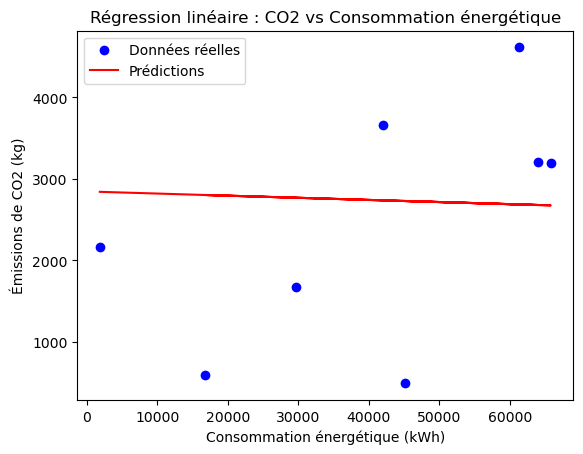

In [541]:
# Pr√©diction et visualisation de la droite de r√©gression sur l'ensemble de test
y1_pred = model1.predict(X1_test)
# plt.figure(figsize=(10, 7))
plt.scatter(X1_test, y1_test, color='blue', label='Donn√©es r√©elles')
plt.plot(X1_test, y1_pred, color='red', label='Pr√©dictions')
plt.xlabel('Consommation √©nerg√©tique (kWh)')
plt.ylabel('√âmissions de CO2 (kg)')
plt.title('R√©gression lin√©aire : CO2 vs Consommation √©nerg√©tique')
plt.legend()
plt.show()

Nous pouvons observer que la droite ne passe pas par les points de notre nuage de points qui repr√©sentent l'ensemble de test. On peut d√©j√† s'appuyer sur ce graphique pour dire que cette droite fourni par le mod√®le ne permet pas de pr√©dire l'√©mission de CO2 en fonction de la consommation √©nerg√©tique 

## Etape 6 : Evaluation du mod√®le

In [543]:
# Calcul du coefficient de corr√©lation avec l'ensemble de test
# Donn√©es
# Calcul du coefficient de corr√©lation
correlation = np.corrcoef(data["Consommation √©nerg√©tique (kWh)"], data['√âmission de CO2 (kg)'])[0, 1]
print(f"Coefficient de corr√©lation lin√©aire (r) : {correlation:.4f}")

# Calcul du coefficient de d√©termination (R2) avec l'ensemble de test
#r2_1 = r2_score(y1_test, y1_pred)
#print(f"Coefficient de d√©termination (R^2) : {r2_1:.4f}")
r2_1 = correlation**2
print(f"Coefficient de d√©termination (R^2) : {r2_1:.4f}")
# Calcul de l'erreur quadratique moyenne (MSE)
mse1 = mean_squared_error(y1_test, y1_pred)
print(f"Erreur quadratique moyenne (MSE) : {mse1:.4f}")

Coefficient de corr√©lation lin√©aire (r) : 0.1251
Coefficient de d√©termination (R^2) : 0.0157
Erreur quadratique moyenne (MSE) : 2085554.5288


Ici en utilisant la m√©thode model.score(r2_score) qui calcule notre coefficient de d√©termination nous obtenons une valeur n√©gative pour les donn√©es de test parce que notre jeu de test est trop petit donc avec cette m√©thode donc on a pr√©f√©rer utiliser la corr√©lation au carr√© comme aborder dans le cours. Ainsi on d√©duit que
la variable consommation d'√©nergie explique seulement 1% de la variance de l'√©mission de CO2.Donc on d√©duit que 
la variable consommation totale √©nerg√©tique n'explique pas la quantit√© de CO2 √©mise, ces variables ne sont pas du tout corr√©l√©s 

##### Choix des meilleurs ( ùúΩ 0 , ùúΩ 1 ) avec la validation crois√©e

In [707]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
import numpy as np
# Configuration de la validation crois√©e
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Donn√©es (X1 : Consommation √©nerg√©tique, y1 : √âmission de CO2)
X1 = data[['Consommation √©nerg√©tique (kWh)']].values  # Variable explicative
y1 = data['√âmission de CO2 (kg)'].values  # Variable cible

# Liste pour stocker les r√©sultats
results = []

# Validation crois√©e
for train_index, test_index in kf.split(X1):
    X1_train, X1_test = X1[train_index], X1[test_index]
    y1_train, y1_test = y1[train_index], y1[test_index]
    
    # R√©gression lin√©aire
    model1 = LinearRegression()
    model1.fit(X1_train, y1_train)
    
    # Extraire les coefficients
    b0 = model1.intercept_
    b1 = model1.coef_[0]
    
    # Pr√©dictions sur l'ensemble de test
    y1_pred = model1.predict(X1_test)
    
    # Calcul des scores
    mse = mean_squared_error(y1_test, y1_pred)
    mae = mean_absolute_error(y1_test, y1_pred)
    r2 = r2_score(y1_test, y1_pred)
    
    # Ajouter les r√©sultats √† la liste
    results.append({'b0': b0, 'b1': b1, 'MSE': mse, 'MAE': mae, 'R2': r2})

# Convertir les r√©sultats en DataFrame pour une meilleure visualisation
results_df = pd.DataFrame(results)

# Identifier les meilleurs coefficients
best_mse_row = results_df.loc[results_df['MSE'].idxmin()]  # Meilleur MSE
best_r2_row = results_df.loc[results_df['R2'].idxmax()]    # Meilleur R¬≤

print("R√©sultats de la validation crois√©e :")
print(results_df)

# Meilleurs coefficients bas√©s sur MSE
print("\nMeilleurs coefficients bas√©s sur le MSE (Erreur Quadratique Moyenne Minimale) :")
print(f"b0 = {best_mse_row['b0']:.2f}, b1 = {best_mse_row['b1']:.2f}")
print(f"MSE = {best_mse_row['MSE']:.2f}, MAE = {best_mse_row['MAE']:.2f}, R¬≤ = {best_mse_row['R2']:.2f}")

# Meilleurs coefficients bas√©s sur R¬≤
print("\nMeilleurs coefficients bas√©s sur le R¬≤ (Coefficient de D√©termination Maximale) :")
print(f"b0 = {best_r2_row['b0']:.2f}, b1 = {best_r2_row['b1']:.2f}")
print(f"MSE = {best_r2_row['MSE']:.2f}, MAE = {best_r2_row['MAE']:.2f}, R¬≤ = {best_r2_row['R2']:.2f}")


R√©sultats de la validation crois√©e :
            b0        b1           MSE          MAE        R2
0  2759.796164  0.000688  2.438487e+06  1372.374254 -0.426383
1  2284.856929  0.005047  9.588865e+05   693.072971 -0.162294
2  2329.249605  0.004819  2.654469e+06  1330.221326 -0.000119
3  2202.239701  0.008416  1.574567e+06   874.015210 -0.086080
4  1851.093875  0.013943  2.862352e+06  1553.725319 -0.239571

Meilleurs coefficients bas√©s sur le MSE (Erreur Quadratique Moyenne Minimale) :
b0 = 2284.86, b1 = 0.01
MSE = 958886.47, MAE = 693.07, R¬≤ = -0.16

Meilleurs coefficients bas√©s sur le R¬≤ (Coefficient de D√©termination Maximale) :
b0 = 2329.25, b1 = 0.00
MSE = 2654469.40, MAE = 1330.22, R¬≤ = -0.00


Ici nous avons essayer de determiner les meilleurs coefficients teta0 et teta1 qui sont aussi b0 et b1 . Nous constatons que les meilleurs coefficients bas√©s sur le R¬≤ (Coefficient de D√©termination ) sont b0 = 2329.25, b1 = 0.00. Cependant cela ne permet pas de trouver une valeur de R¬≤ significatives pour notre jeu de donn√©es).

Tracer de la droite de r√©gression √† partir du meilleur choix possible des valeurs de ùúΩ 0 et ùúΩ 1 pour notre jeu de donn√©es

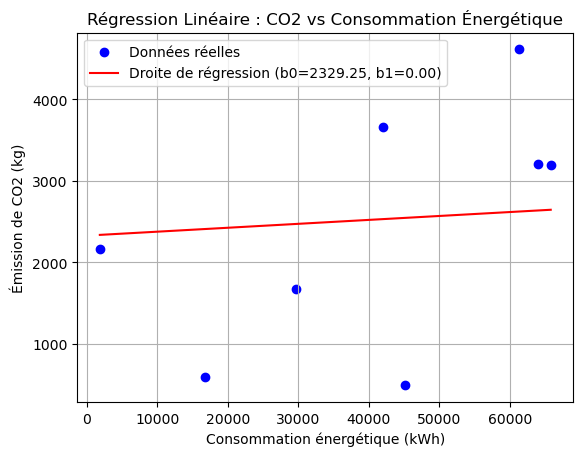

In [711]:
X1 = data[['Consommation √©nerg√©tique (kWh)']]
y1 = data['√âmission de CO2 (kg)']
# S√©paration des donn√©es en ensembles d'entra√Ænement et de test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Meilleurs coefficients bas√©s sur le MSE
best_b0 = best_r2_row['b0']
best_b1 = best_r2_row['b1']

# G√©n√©rer les pr√©dictions bas√©es sur les meilleurs coefficients
x_range = np.linspace(X1_test.min(), X1_test.max(), 100).reshape(-1, 1)  # G√©n√©rer des points sur la plage des X
y_pred = best_b0 + best_b1 * x_range  # Calculer y = b0 + b1 * x

# Tracer les points de donn√©es r√©els
plt.scatter(X1_test, y1_test, color='blue', label='Donn√©es r√©elles')

# Tracer la droite de r√©gression
plt.plot(x_range, y_pred, color='red', label=f'Droite de r√©gression (b0={best_b0:.2f}, b1={best_b1:.2f})')

# Ajouter des √©tiquettes et un titre
plt.title("R√©gression Lin√©aire : CO2 vs Consommation √ânerg√©tique")
plt.xlabel("Consommation √©nerg√©tique (kWh)")
plt.ylabel("√âmission de CO2 (kg)")
plt.legend()

# Afficher le graphique
plt.grid()
plt.show()

### Partie 2 : 
Pr√©diction de la quantit√© de CO2 √©mise en fonction du nombre d'utilisateurs

In [550]:
# R√©gression lin√©aire 2 : CO2 en fonction du nombre d'utilisateurs
X2 = data[["Nombre d'utilisateurs"]]
y2 = data['√âmission de CO2 (kg)']
#X2 = data['Nombre d\'utilisateurs'].values.reshape(-1,1)
#X = X.values.reshape((X.shape[0], 1))
#y2 = data['√âmissions de CO2 (kg)'].values
# S√©paration des donn√©es en ensembles d'entra√Ænement et de test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(17, 1)
(17,)
(8, 1)
(8,)


In [552]:
# Entra√Ænement du mod√®le sur l'ensemble d'entra√Ænement 70%
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
# Affichage des coefficients
b0 = model2.intercept_
b1 = model2.coef_[0]
print(f"√âquation de la droite de r√©gression : y = {b0:.2f} + {b1:.2f} * x")

√âquation de la droite de r√©gression : y = 1655.97 + 0.00 * x


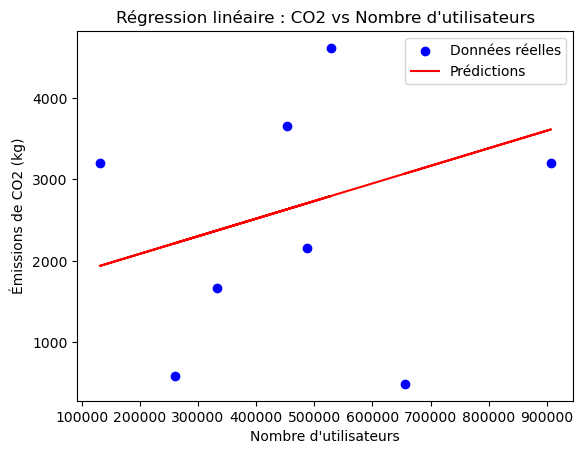

In [554]:
# Pr√©diction et visualisation de la droite de r√©gression sur l'ensemble de test
y2_pred = model2.predict(X2_test)
# plt.figure(figsize=(10, 7))
plt.scatter(X2_test, y2_test, color='blue', label='Donn√©es r√©elles')
plt.plot(X2_test, y2_pred, color='red', label='Pr√©dictions')
plt.xlabel("Nombre d'utilisateurs")
plt.ylabel('√âmissions de CO2 (kg)')
plt.title('R√©gression lin√©aire : CO2 vs Nombre d\'utilisateurs')
plt.legend()
plt.show()

Ici on a une droite un peu plus lin√©aire cependant elle ne passe toujours pas par les points de notre nuage de donn√©es 

In [557]:
# Calcul du coefficient de corr√©lation avec l'ensemble de test
# Donn√©es
# Calcul du coefficient de corr√©lation
correlation = np.corrcoef(data["Nombre d'utilisateurs"], data['√âmission de CO2 (kg)'])[0, 1]
print(f"Coefficient de corr√©lation lin√©aire (r) : {correlation:.4f}")
# Calcul du coefficient de d√©termination (R2) avec l'ensemble de test
#r2_2 = r2_score(y2_test, y2_pred)
#print(f"Coefficient de d√©termination (R^2) : {r2_2:.4f}")
r2_2 = correlation**2
print(f"Coefficient de d√©termination (R^2) : {r2_2:.4f}")
# Calcul de l'erreur quadratique moyenne (MSE)
mse2 = mean_squared_error(y2_test, y2_pred)
print(f"Erreur quadratique moyenne (MSE) : {mse2:.4f}")

Coefficient de corr√©lation lin√©aire (r) : 0.3642
Coefficient de d√©termination (R^2) : 0.1326
Erreur quadratique moyenne (MSE) : 2025854.1709


La variable nombre d'utilisateurs explique seulement 13% de la variance de l'√©mission de CO2. Ce qui signifie que le mod√®le de r√©gression lin√©aire simple ne permet pas de faire de bonnes pr√©dictions sur le jeu de donn√©es que nous utilisons. Ce qui est normal car nos donn√©es ne sont que peu corr√©l√©s  

##### Choix des meilleurs ( ùúΩ 0 , ùúΩ 1 ) gr√¢ce √† la validation crois√©e 

In [714]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
import numpy as np
# Configuration de la validation crois√©e
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Donn√©es (X1 : Consommation √©nerg√©tique, y1 : √âmission de CO2)
X2 = data[['Nombre d\'utilisateurs']].values  # Variable explicative
y2 = data['√âmission de CO2 (kg)'].values  # Variable cible

# Liste pour stocker les r√©sultats
results = []

# Validation crois√©e
for train_index, test_index in kf.split(X2):
    X2_train, X2_test = X2[train_index], X2[test_index]
    y2_train, y2_test = y2[train_index], y2[test_index]
    
    # R√©gression lin√©aire
    model2 = LinearRegression()
    model2.fit(X2_train, y2_train)
    
    # Extraire les coefficients
    b0 = model2.intercept_
    b1 = model2.coef_[0]
    
    # Pr√©dictions sur l'ensemble de test
    y2_pred = model2.predict(X2_test)
    
    # Calcul des scores
    mse = mean_squared_error(y2_test, y2_pred)
    mae = mean_absolute_error(y2_test, y2_pred)
    r2 = r2_score(y2_test, y2_pred)
    
    # Ajouter les r√©sultats √† la liste
    results.append({'b0': b0, 'b1': b1, 'MSE': mse, 'MAE': mae, 'R2': r2})

# Convertir les r√©sultats en DataFrame pour une meilleure visualisation
results_df = pd.DataFrame(results)

# Identifier les meilleurs coefficients
best_mse_row = results_df.loc[results_df['MSE'].idxmin()]  # Meilleur MSE
best_r2_row = results_df.loc[results_df['R2'].idxmax()]    # Meilleur R¬≤

print("R√©sultats de la validation crois√©e :")
print(results_df)

# Meilleurs coefficients bas√©s sur MSE
print("\nMeilleurs coefficients bas√©s sur le MSE (Erreur Quadratique Moyenne Minimale) :")
print(f"b0 = {best_mse_row['b0']:.2f}, b1 = {best_mse_row['b1']:.2f}")
print(f"MSE = {best_mse_row['MSE']:.2f}, MAE = {best_mse_row['MAE']:.2f}, R¬≤ = {best_mse_row['R2']:.2f}")

# Meilleurs coefficients bas√©s sur R¬≤
print("\nMeilleurs coefficients bas√©s sur le R¬≤ (Coefficient de D√©termination Maximale) :")
print(f"b0 = {best_r2_row['b0']:.2f}, b1 = {best_r2_row['b1']:.2f}")
print(f"MSE = {best_r2_row['MSE']:.2f}, MAE = {best_r2_row['MAE']:.2f}, R¬≤ = {best_r2_row['R2']:.2f}")


R√©sultats de la validation crois√©e :
            b0        b1           MSE          MAE        R2
0  1882.085579  0.001947  2.416003e+06  1332.453388 -0.413231
1  1319.584153  0.002491  1.816993e+06  1227.471447 -1.202429
2  1884.319417  0.001456  1.988654e+06  1172.961935  0.250739
3  1680.512125  0.001996  1.482772e+06   932.704323 -0.022764
4  1917.932228  0.001363  1.688981e+06  1152.472791  0.268569

Meilleurs coefficients bas√©s sur le MSE (Erreur Quadratique Moyenne Minimale) :
b0 = 1680.51, b1 = 0.00
MSE = 1482772.50, MAE = 932.70, R¬≤ = -0.02

Meilleurs coefficients bas√©s sur le R¬≤ (Coefficient de D√©termination Maximale) :
b0 = 1917.93, b1 = 0.00
MSE = 1688980.80, MAE = 1152.47, R¬≤ = 0.27


Ici nous avons essayer de determiner les meilleurs coefficients teta0 et teta1 qui sont aussi b0 et b1 . Nous constatons que les meilleurs coefficients bas√©s sur le R¬≤ (Coefficient de D√©termination ) sont b0 = 1917.93, b1 = 0.00. Et on trouve une meilleure valeur du R¬≤ spitulant que la variable cible est expliqu√© √† un taux de 27% par la variable expliacative

Tracer de la droite de r√©gression √† partir du meilleur choix possible des valeurs de  ùúΩ 0 et ùúΩ 1 pour notre jeu de donn√©es

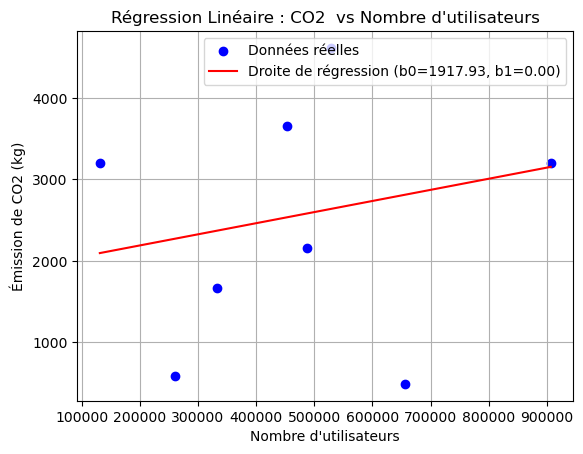

In [718]:
X2 = data[['Nombre d\'utilisateurs']]  # Variable explicative
y2 = data['√âmission de CO2 (kg)']  # Variable cible
# S√©paration des donn√©es en ensembles d'entra√Ænement et de test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Meilleurs coefficients bas√©s sur le MSE
best_b0 = best_r2_row['b0']
best_b1 = best_r2_row['b1']

# G√©n√©rer les pr√©dictions bas√©es sur les meilleurs coefficients
x_range = np.linspace(X2_test.min(), X2_test.max(), 100).reshape(-1, 1)  # G√©n√©rer des points sur la plage des X
y_pred = best_b0 + best_b1 * x_range  # Calculer y = b0 + b1 * x

# Tracer les points de donn√©es r√©els
plt.scatter(X2_test, y2_test, color='blue', label='Donn√©es r√©elles')

# Tracer la droite de r√©gression
plt.plot(x_range, y_pred, color='red', label=f'Droite de r√©gression (b0={best_b0:.2f}, b1={best_b1:.2f})')

# Ajouter des √©tiquettes et un titre
plt.title("R√©gression Lin√©aire : CO2  vs Nombre d'utilisateurs")
plt.xlabel("Nombre d'utilisateurs")
plt.ylabel("√âmission de CO2 (kg)")
plt.legend()

# Afficher le graphique
plt.grid()
plt.show()

Donc √† la fin on obtient une meilleure droite de r√©gression

## VALIDATION DU MODELE

In [722]:
from sklearn.model_selection import cross_val_score, KFold

# Variable explicative ( X1) et variable √† expliquer y1
X1 = data[['Consommation √©nerg√©tique (kWh)']].values  # Variable explicative
y1 = data['√âmission de CO2 (kg)'].values  # Variable cible


# Cr√©er le mod√®le de r√©gression lin√©aire
model1 = LinearRegression()

# Entra√Æner le mod√®le sur l'ensemble des donn√©es
model1.fit(X1, y1)

# Afficher les coefficients estim√©s
print(f"Estimation des param√®tres : Intercept (Œ≤0) = {model1.intercept_}, Coefficients (Œ≤1) = {model1.coef_}")

# Calculer le coefficient de d√©termination R2
r2_score = model1.score(X1, y1)
print(f"Coefficient de d√©termination R¬≤ (sur l'ensemble des donn√©es) : {r2_score}")

# Appliquer la validation crois√©e (k-fold = 5 ici)
kf = KFold(n_splits=5, shuffle=True, random_state=42)


# Appliquer la validation crois√©e pour calculer R2
cross_val_r2 = cross_val_score(model1, X1, y1, cv=kf, scoring='r2')

# Afficher les r√©sultats
print("Scores R¬≤ sur les folds de validation crois√©e :", cross_val_r2)
print("Moyenne des scores R¬≤ :", cross_val_r2.mean())
print("√âcart-type des scores R¬≤ :", cross_val_r2.std())


# Variable explicative ( X1) et variable √† expliquer y1
X2 = data[['Nombre d\'utilisateurs']].values  # Variable explicative
y2 = data['√âmission de CO2 (kg)'].values  # Variable cible


# Cr√©er le mod√®le de r√©gression lin√©aire
model2 = LinearRegression()

# Entra√Æner le mod√®le sur l'ensemble des donn√©es
model2.fit(X2, y2)

# Afficher les coefficients estim√©s
print('\n \n')
print(f"Estimation des param√®tres : Intercept (Œ≤0) = {model2.intercept_}, Coefficients (Œ≤1) = {model2.coef_}")

# Calculer le coefficient de d√©termination R2
r2_score2 = model2.score(X2, y2)
print(f"Coefficient de d√©termination R¬≤ (sur l'ensemble des donn√©es) : {r2_score2}")

# Appliquer la validation crois√©e (k-fold = 5 ici)
kf = KFold(n_splits=5, shuffle=True, random_state=42)


# Appliquer la validation crois√©e pour calculer R2
cross_val_r2_2 = cross_val_score(model2, X2, y2, cv=kf, scoring='r2')

# Afficher les r√©sultats

print("Scores R¬≤ sur les folds de validation crois√©e :", cross_val_r2_2)
print("Moyenne des scores R¬≤ :", cross_val_r2_2.mean())
print("√âcart-type des scores R¬≤ :", cross_val_r2_2.std())



Estimation des param√®tres : Intercept (Œ≤0) = 2305.305339791924, Coefficients (Œ≤1) = [0.0062589]
Coefficient de d√©termination R¬≤ (sur l'ensemble des donn√©es) : 0.015661469868615496
Scores R¬≤ sur les folds de validation crois√©e : [-4.26383388e-01 -1.62293955e-01 -1.18620777e-04 -8.60801418e-02
 -2.39571101e-01]
Moyenne des scores R¬≤ : -0.18288944121722986
√âcart-type des scores R¬≤ : 0.14539841812173607

 

Estimation des param√®tres : Intercept (Œ≤0) = 1728.745129648395, Coefficients (Œ≤1) = [0.00186047]
Coefficient de d√©termination R¬≤ (sur l'ensemble des donn√©es) : 0.1326120613125913
Scores R¬≤ sur les folds de validation crois√©e : [-0.41323134 -1.2024293   0.25073914 -0.02276378  0.26856938]
Moyenne des scores R¬≤ : -0.22382317936677767
√âcart-type des scores R¬≤ : 0.5480200901187118


Nous pouvons dire globalement que pour notre jeu de donn√©e, des deux variables explicatives qui sont la consommation d'√©nergie et le nombre d'utilisateurs c'est le nombre d'utilisateurs qui arrive √† expliquer le mieux la variable cible qui est l'√©mission de CO2. Cependant du fait que nos variables explicatives ne soit pas assez corr√©l√©s √† la variable cible, le mod√®le de regression lin√©aire devient inappropri√© pour ce jeu de donn√©e. Ce qui donne une faible valeur pour le coefficient de d√©termination et beaucoup d'erreur de pr√©diction

# CONCLUSION

La faible performance du mod√®le peut √™tre attribu√©e √† plusieurs facteurs interd√©pendants. D'une part, les variables explicatives s√©lectionn√©es pr√©sentent une relation limit√©e avec la variable cible, ce qui r√©duit leur capacit√© √† expliquer les variations observ√©es. D'autre part, l'utilisation de la r√©gression lin√©aire comme approche peut s'av√©rer inad√©quate pour capturer des relations potentiellement plus complexes entre les donn√©es. Enfin, la qualit√© des donn√©es constitue un autre d√©fi, avec la pr√©sence de bruit, de valeurs aberrantes, ou encore d'un volume insuffisant d'observations, limitant ainsi la robustesse et la fiabilit√© des r√©sultats obtenus. Ces √©l√©ments soulignent la n√©cessit√© d'am√©liorer la s√©lection des variables, d'explorer des mod√®les plus adapt√©s, et de renforcer la qualit√© des donn√©es utilis√©es.

# Algo 2 : KNN (Classification de l'efficacit√© √©nerg√©tique)


## INTRODUCTION

L'impact environnemental des services num√©riques constitue une pr√©occupation majeure √† l'√®re de la transition √©cologique. Dans ce contexte, ce projet vise √† classifier l'efficacit√© √©nerg√©tique de ces services en √©valuant leur empreinte carbone. En utilisant l'algorithme K-Nearest Neighbors (KNN), l'objectif est de regrouper les services en trois cat√©gories distinctes : faible, moyenne et √©lev√©e, sur la base de leurs √©missions de CO‚ÇÇ. 
√Ä travers une m√©thodologie rigoureuse incluant la pr√©paration des donn√©es, l'entra√Ænement du mod√®le et l'√©valuation de ses performances, ce projet contribue √† une meilleure compr√©hension et gestion de la durabilit√© num√©rique.

## Etape 1 : Pr√©paration des donn√©es 

In [364]:
# Nous allons d'abord diviser la variable "√âmission de CO2 (kg)" en cat√©gories : "faible", "moyenne", "√©lev√©e". 
#Nous utiliserons les quantiles pour d√©finir ces cat√©gories.

import pandas as pd
import numpy as np

df = pd.read_csv("services_numeriques.csv")

bins = [0, df['√âmission de CO2 (kg)'].quantile(0.33), df['√âmission de CO2 (kg)'].quantile(0.67), df['√âmission de CO2 (kg)'].max()]
labels = ['faible', 'moyenne', '√©lev√©e']
df['Cat√©gorie d\'empreinte carbone'] = pd.cut(df['√âmission de CO2 (kg)'], bins=bins, labels=labels)

df

Unnamed: 0            Service num√©rique  Consommation √©nerg√©tique (kWh)  \
0            1             Streaming vid√É¬©o                           16795   
1            2       Recherche sur internet                            1860   
2            3             R√É¬©seaux sociaux                           77820   
3            4                   E-commerce                           55886   
4            5                Jeux en ligne                            7265   
5            6              Cloud computing                           83386   
6            7                        Email                           38194   
7            8         Stockage de fichiers                           88498   
8            9   Applications de messagerie                           45131   
9           10              Streaming audio                           61263   
10          11                    Webinaire                           17023   
11          12          √É‚Ä∞ducation en ligne                           42090   
12          13          Publicit√É¬© en ligne                           68221   
13          14                T√É¬©l√É¬©travail                           65820   
14          15  Services bancaires en ligne                            1769   
15          16      Applications de fitness                           60735   
16          17     Services de r√É¬©servation                           63955   
17          18        Services de livraison                           65925   
18          19  Services de sant√É¬© en ligne                           68969   
19          20       Applications de voyage                            6311   
20          21  Plateformes de crowdfunding                           84104   
21          22              Forums en ligne                           54707   
22          23                        Blogs                           86305   
23          24                     Podcasts                           29693   
24          25     Services de t√É¬©l√É¬©phonie                           72932   

    Nombre d'utilisateurs Type d'Energie utilis√©e       Pays  \
0                  259795            Renouvelable     France   
1                  487232            Renouvelable         UK   
2                  918040            Renouvelable  Allemagne   
3                  501186            Renouvelable         UK   
4                  157730        Non-renouvelable  Allemagne   
5                  871910        Non-renouvelable  Allemagne   
6                  385681            Renouvelable         UK   
7                  150503        Non-renouvelable     Canada   
8                  655811        Non-renouvelable  Allemagne   
9                  528035        Non-renouvelable  Allemagne   
10                 649143        Non-renouvelable         UK   
11                 453366            Renouvelable  Allemagne   
12                  66725        Non-renouvelable  Allemagne   
13                 130981            Renouvelable         UK   
14                  85654        Non-renouvelable         UK   
15                 954277        Non-renouvelable     France   
16                 906778        Non-renouvelable     Canada   
17                 592723            Renouvelable     Canada   
18                 320030        Non-renouvelable  Allemagne   
19                 329947            Renouvelable     Canada   
20                 556839        Non-renouvelable  Allemagne   
21                 903648            Renouvelable     France   
22                 274538        Non-renouvelable         UK   
23                 332236            Renouvelable         UK   
24                 529178            Renouvelable         UK   

    √âmission de CO2 (kg) Cat√©gorie d'empreinte carbone  
0                    592                        faible  
1                   2162                       moyenne  
2                   3984                        √©lev√©e  
3                    164   

## Visualisation de la r√©partition des cat√©gories 

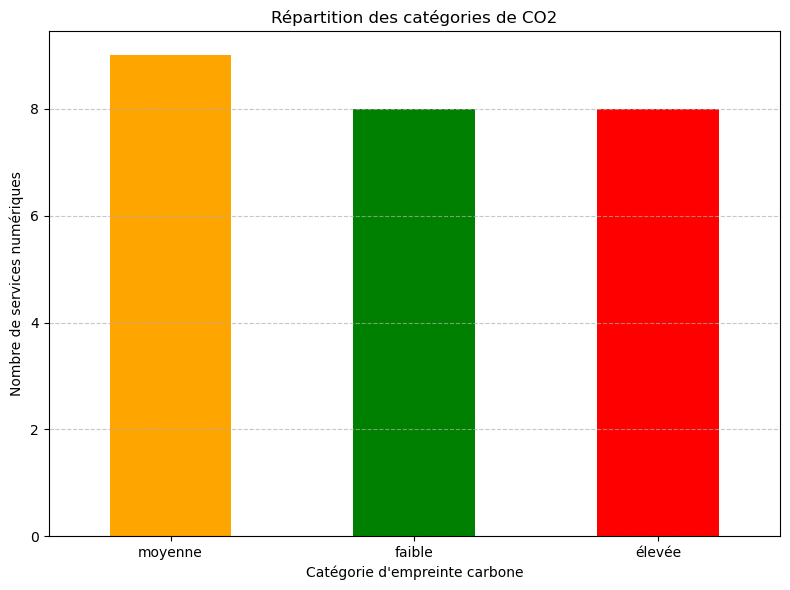

In [292]:
import matplotlib.pyplot as plt

# Visualiser la r√©partition des cat√©gories
category_distribution = df["Cat√©gorie d\'empreinte carbone"].value_counts()

plt.figure(figsize=(8, 6))
category_distribution.plot(kind='bar', color=['orange', 'green', 'red'])
plt.title("R√©partition des cat√©gories de CO2")
plt.xlabel("Cat√©gorie d\'empreinte carbone")
plt.ylabel("Nombre de services num√©riques")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Etape 2: S√©paration des donn√©es 

In [294]:
from sklearn.model_selection import train_test_split

# Variables explicatives et cible
X = df[['Consommation √©nerg√©tique (kWh)', 'Nombre d\'utilisateurs']]
y = df['Cat√©gorie d\'empreinte carbone']

# S√©paration des donn√©es en ensembles d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Afficher les tailles des ensembles
print(f"Taille de l'ensemble d'entra√Ænement : {X_train.shape[0]} exemples")
print(f"Taille de l'ensemble de test : {X_test.shape[0]} exemples")


Taille de l'ensemble d'entra√Ænement : 17 exemples
Taille de l'ensemble de test : 8 exemples


## √âtape 3 : Choix du mod√®le KNN

In [298]:
#Nous allons utiliser l'algorithme KNN et essayer plusieurs valeurs de K pour trouver la meilleure.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt

# Essayer plusieurs valeurs de K
k_values = range(1,18) #on fais varier k entre 1 et 18 parceque selon les principes de KNN, le k doit etre au plus √©gal au nombre de donn√©es du jeu 
                        #d'entrainement ( ce qui est 18 dans notre cas ici. la fonction range prenant les valeurs de 1 √† n-1 donc il s'arrete √† 18 

best_k = 1
best_accuracy = 0

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Meilleur K: {best_k} avec une pr√©cision de {best_accuracy:.2f}")



Meilleur K: 7 avec une pr√©cision de 0.50


Nous constatons que le meilleur k est k=7, ce qui n'est pas loin de la racine carr√©e (5) exacte du jeu de donn√©es total(25). Or d'apr√®s le cours: En pratique, la valeur optimale de k conseill√©e est la racine carr√©e de N, o√π N est le nombre total d'√©chantillons.Nous estimons donc que notre mod√®le a pu d√©terminer de fa√ßon approximative le K id√©al quand bien m√™me que la pr√©cision est de 50% (ce qui est normal vu la plage de valeurs k que nous avons propos√©).

## Etape 4: Entrainement du mod√®le

In [302]:
#Entra√Ænons le mod√®le KNN sur les variables explicatives : Consommation √©nerg√©tique (kWh) et Nombre d'utilisateurs. La variable cible sera la 
#cat√©gorie d‚Äôempreinte carbone (faible, moyenne, √©lev√©e)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Nous cr√©ons d'abord le mod√®le KNN avec la meilleure valeur optimale de K trouv√©e pr√©c√©demment.
model = KNeighborsClassifier(n_neighbors=best_k)  

# Et on finit par entrainer le mod√®le sur les donn√©es d'entra√Ænement
model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

## Pr√©diction sur les donn√©es de test



In [304]:
#Apr√®s entrainement, nous allons pr√©dire les labels sur l'ensemble de test.

y_pred = model.predict(X_test)

# Cr√©ation du DataFrame pour afficher les r√©sultats de mani√®re organis√©e
results_df = pd.DataFrame({
    'Labels r√©els': y_test,
    'Labels pr√©dits': y_pred
})
print(results_df)

# Calcul de la pr√©cision du mod√®le
accuracy = accuracy_score(y_test, y_pred)

# Affichage de la pr√©cision
print(f"Pr√©cision du mod√®le avec K={best_k}: {accuracy:.2f}")


   Labels r√©els Labels pr√©dits
8        faible         faible
16       √©lev√©e         √©lev√©e
0        faible        moyenne
23       faible        moyenne
11       √©lev√©e        moyenne
9        √©lev√©e         √©lev√©e
13      moyenne        moyenne
1       moyenne         √©lev√©e
Pr√©cision du mod√®le avec K=7: 0.50


## Etape 5: √âvaluation du mod√®le


In [308]:
from sklearn.metrics import confusion_matrix, classification_report

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(conf_matrix)

# Afficher le rapport de classification (pr√©cision, rappel, f1-score)
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

#  affichage de la pr√©cision (accuracy) 
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPr√©cision (Accuracy) du mod√®le : {accuracy:.2f}")


Matrice de confusion :
[[1 2 0]
 [0 1 1]
 [0 1 2]]

Rapport de classification :
              precision    recall  f1-score   support

      faible       1.00      0.33      0.50         3
     moyenne       0.25      0.50      0.33         2
      √©lev√©e       0.67      0.67      0.67         3

    accuracy                           0.50         8
   macro avg       0.64      0.50      0.50         8
weighted avg       0.69      0.50      0.52         8


Pr√©cision (Accuracy) du mod√®le : 0.50


# VALIDATION DU MODELE

## VISUALISATION DE LA HEATMAP DE LA MATRICE DE CONFUSION

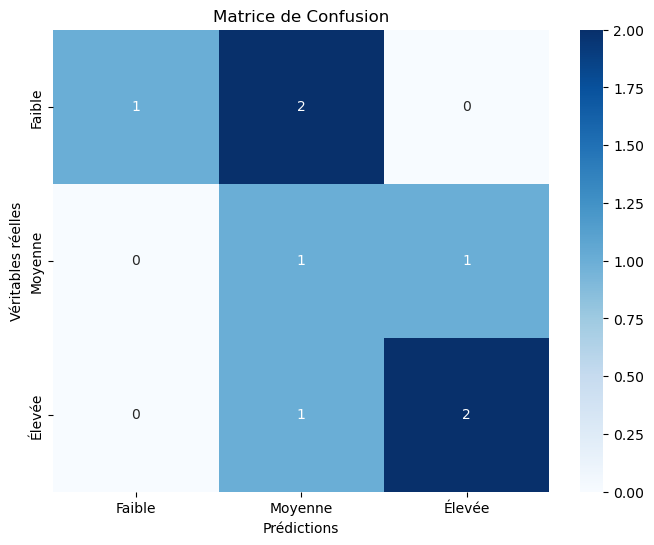

In [310]:
#Pour ajouter une heatmap de la matrice de confusion, nous utiliserons la biblioth√®que Seaborn pour une visualisation plus claire des performances du mod√®le

import seaborn as sns
import matplotlib.pyplot as plt

# Cr√©ation de la heatmap de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Faible', 'Moyenne', '√âlev√©e'], 
            yticklabels=['Faible', 'Moyenne', '√âlev√©e'])

# Ajout des labels et un titre
plt.title('Matrice de Confusion')
plt.xlabel('Pr√©dictions')
plt.ylabel('V√©ritables r√©elles')

# Afficher la heatmap
plt.show()


Analyse de la Heatmap

- Observations g√©n√©rales :
  - La heatmap montre que les pr√©dictions correctes (cases diagonales) sont limit√©es, et les erreurs (cases hors diagonale) restent fr√©quentes. Cela refl√®te la difficult√© du mod√®le √† bien distinguer les trois cat√©gories d'empreinte carbone ("faible," "moyenne," "√©lev√©e").
  - La confusion entre les classes peut √™tre due au manque d‚Äôexemples repr√©sentatifs dans un dataset aussi r√©duit (25 services).
  

- R√©partition des erreurs :
  - Certaines classes peuvent dominer les pr√©dictions en raison de leur sur-repr√©sentation relative, ou inversement, les classes minoritaires peuvent √™tre syst√©matiquement mal classifi√©es.
 

    Faibles performances g√©n√©rales :

Si les valeurs hors de la diagonale sont √©lev√©es, cela signifie que le mod√®le a souvent confondu les cat√©gories. Par exemple :
"Faible" a souvent √©t√© class√© comme "Moyenne".
"√âlev√©e" a √©t√© class√© incorrectement comme "Moyenne", indiquant une tendance du mod√®le √† privil√©gier certaines classes (moyenne) dans notre cas.

    Sources possibles d'erreur :

Les seuils pour diviser les √©missions de CO‚ÇÇ en cat√©gories ("faible", "moyenne", "√©lev√©e") pourraient √™tre mal adapt√©s et ne pas refl√©ter une s√©paration nette dans les donn√©es.
Les classes pourraient √™tre d√©s√©quilibr√©es (par exemple, davantage de services dans une cat√©gorie sp√©cifique), influen√ßant le mod√®le √† privil√©gier les cat√©gories majoritaires.


#  Cross-validation : 

Nous effectuons une validation crois√©e pour s‚Äôassurer de la 
robustesse du mod√®le KNN

In [314]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import  StratifiedKFold

cv = StratifiedKFold(5)
                        #On utilise StratifiedKFold au lieu de KFold ou de ShuffleSplit pour s'assurer que la r√©partition des classes dans 
                        #chaque sous-√©chantillon refl√®te celle du jeu de donn√©es d'origine, ce qui est crucial pour les ensembles d√©s√©quilibr√©s. 
                        #Cela garantit une meilleure √©valuation des performances du mod√®le.


scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# R√©sultats
print(f"Scores par pli : {scores}")
print(f"Pr√©cision moyenne : {scores.mean():.2f}")
print(f"√âcart-type des scores : {scores.std():.2f}")


Scores par pli : [0.4 0.4 0.4 0.4 0.2]
Pr√©cision moyenne : 0.36
√âcart-type des scores : 0.08


## Interpr√©tation des r√©sultats



    Pr√©cision globale (36%) :
    
Le mod√®le est l√©g√®rement meilleur qu‚Äôun mod√®le al√©atoire (qui aurait une pr√©cision attendue de ~33% pour trois classes), mais il reste tr√®s loin de l‚Äôobjectif id√©al (souvent fix√© √† 85% ou plus dans ce type de projet).
Cela indique que le KNN capte tr√®s peu de patterns significatifs dans les donn√©es et que ses pr√©dictions manquent de fiabilit√©.
Dans sa configuration actuelle, le mod√®le ne parvient pas √† s√©parer correctement les classes d‚Äôempreinte carbone.
De plus, avec un petit dataset, le mod√®le manque probablement de suffisamment de voisins pertinents pour √©tablir des relations solides entre les variables explicatives et la variable cible.
    
    - Impact du petit dataset :
    
Le mod√®le est fortement limit√© par la taille des donn√©es : 25 services ne permettent pas de capturer la diversit√© et les nuances des cat√©gories d‚Äôempreinte carbone.  Les trois classes d‚Äôempreinte carbone sont probablement sous-√©chantillonn√©es, augmentant les erreurs de classification.
Les valeurs proches dans l'espace des variables explicatives peuvent entra√Æner des pr√©dictions erron√©es, car elles n'appartiennent pas forc√©ment √† la m√™me classe cible.


    -Corr√©lation entre variables :
    
Les deux variables utilis√©es (consommation √©nerg√©tique et nombre d'utilisateurs) pourraient ne pas √™tre assez explicatives. Inclure des variables comme le type d'√©nergie ou des indicateurs g√©ographiques pourrait fournir des insights suppl√©mentaires.


    -Cat√©gorisation des √©missions de CO‚ÇÇ :

La m√©thode de segmentation en trois cat√©gories (quantiles) ne refl√®te surement pas correctement les relations entre les variables et les classes.


    M√©triques compl√©mentaires :

Le rapport de classification (pr√©cision, rappel, F1-score) permet d'approfondir cette analyse :
Une pr√©cision globale de 36% peut masquer des disparit√©s entre les classes.
Certaines cat√©gories pourraient avoir une pr√©cision ou un rappel √©lev√©s, tandis que d'autres sont n√©glig√©es. Par exemple dans notre cas ci: 
Une faible pr√©cision (precision) pour la cat√©gorie "moyenne" indique que les pr√©dictions pour cette cat√©gorie sont souvent incorrectes.
Un faible rappel (recall) de la cat√©gorie "faible" montre que le mod√®le a du mal √† identifier correctement les √©l√©ments pertinents dans cette cat√©gorie. 



In [ ]:
#SUGGESTIONS POUR AMELIORATION


1. Augmenter la taille du dataset :
   - Passer de 25 √† au moins 100 ou 1000 services num√©riques en g√©n√©rant des donn√©es suppl√©mentaires ou en collectant des donn√©es r√©elles.
   - Cela am√©liorerait la repr√©sentativit√© des classes et la performance du mod√®le.
   - Un dataset √©largi permettrait de fournir davantage d‚Äôexemples pour que le mod√®le identifie des patterns plus clairs.
  

2. Am√©liorer l'√©quilibre entre classes : Utiliser des techniques de r√©sampling (oversampling, SMOTE) pour √©quilibrer les cat√©gories sous-repr√©sent√©es.

3. Explorer d'autres mod√®les :
   - Le KNN est sensible √† la taille du dataset. Tester d'autres valeurs de K avec "validation crois√©e" pourrait limiter l'impact du dataset r√©duit     et ainsi am√©liorer la performance.     -Optimiser le mod√®le, en explorant des algorithmes alternatifs ou des techniques de pr√©traitement avanc√©es.
   - Des algorithmes plus robustes (comme les arbres de d√©cision ou les for√™ts al√©atoires) pourraient mieux g√©rer les petits datasets.

4. Analyser les variables :
   - V√©rifier si les variables explicatives (consommation √©nerg√©tique, nombre d'utilisateurs) suffisent pour bien discriminer les classes. 
            Ajouter des variables comme le type d'√©nergie ou le pays pourrait am√©liorer les pr√©dictions.


## CONCLUSION

Le projet montre que, m√™me avec un dataset limit√©, un mod√®le KNN capte tr√®s peu de patterns, et la pr√©cision de 36% reste insuffisante pour des pr√©dictions fiables. Pour am√©liorer ces r√©sultats, il est crucial d'√©largir le dataset et d'explorer des approches compl√©mentaires. Cette √©tude souligne l'importance de disposer de donn√©es riches et diversifi√©es pour obtenir des analyses fiables et exploitables.


## PISTES DE SOLUTION POUR FAIRE EVOLUER LA PERFORMANCE DU MODELE: 
### Elargir le dataset de 25 √† 1000 √©chantillons

Proc√©dons maintenant √† l'√©largissement du dataset en vue de performer le mod√®le tel quon l'a sugg√©r√© pr√©c√©demment. Nous verrons √† la fin si  l'application de cette proposition a pu faire √©voluer le,mod√®le d'une quelconque fa√ßon.  
Etant donn√© qu'ici nous ne ferons que g√©n√©rer un nouveau dataset de 1000 √©chantillons et qu'il faudra juste charger ce fichier csv √† notre mod√®le, nous n'allons plus s√©quencer le code tel qu'il a √©t√© fait pr√©c√©demment mais r√©unir toute les √©tapes dans une m√™me section de code. Les commentaires appropri√©s au nouveau dataset seront toutefois √©num√©r√©s.

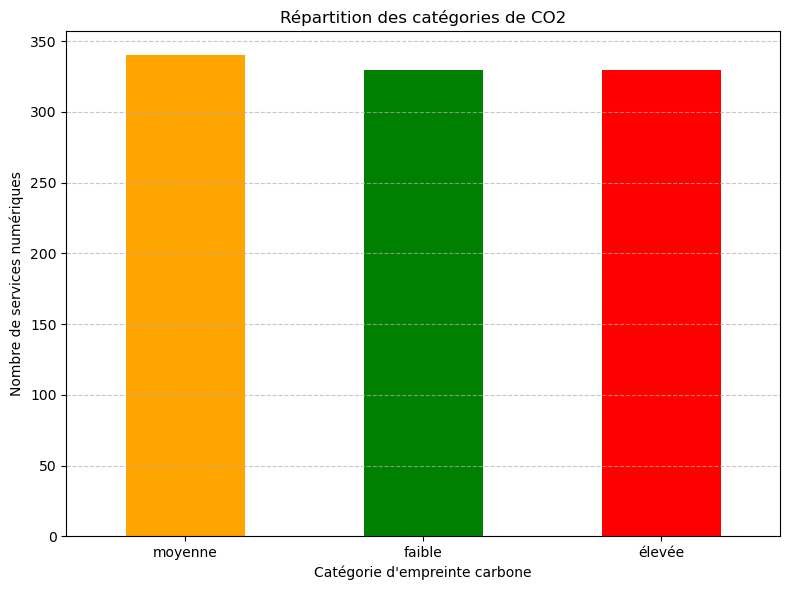



Taille de l'ensemble d'entra√Ænement : 700 exemples
Taille de l'ensemble de test : 300 exemples


Meilleur K: 27 avec une pr√©cision de 0.65




    Labels r√©els Labels pr√©dits
521       faible         faible
737       faible         faible
740       faible         faible
660       faible         √©lev√©e
411       faible         faible
..           ...            ...
468       faible         faible
935       faible         faible
428      moyenne         √©lev√©e
7        moyenne        moyenne
155       faible         faible

[300 rows x 2 columns]


Pr√©cision du mod√®le avec K=27: 0.65


Matrice de confusion :
[[89  7  7]
 [19 44 46]
 [ 3 24 61]]

Rapport de classification :
              precision    recall  f1-score   support

      faible       0.80      0.86      0.83       103
     moyenne       0.59      0.40      0.48       109
      √©lev√©e       0.54      0.69      0.60        88

    accuracy                           0.65       300
   macro avg       0.64      0.65 

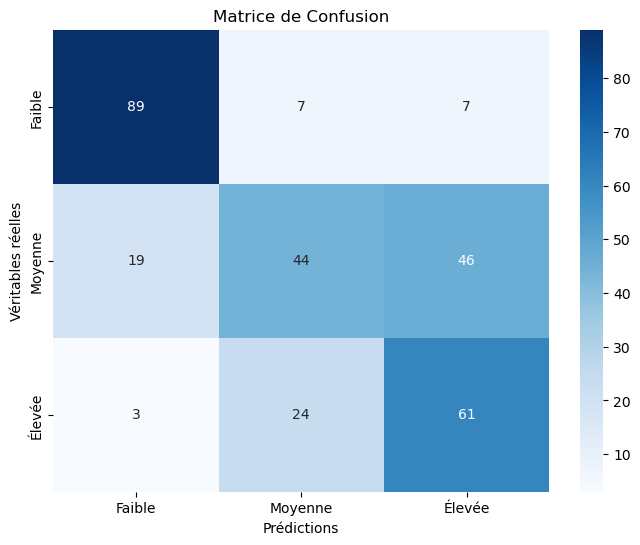



Scores par pli : [0.68  0.635 0.64  0.6   0.65 ]
Pr√©cision moyenne : 0.64
√âcart-type des scores : 0.03


In [328]:
#Etape1 : G√©n√©ration de donn√©es 
    #Le fichier csv a d√©j√† √©t√© g√©n√©r√©. Nous avons utiliser le code du d√©but et changer le prompt en demandant un dataset de 1000 √©chantillons

import pandas as pd
import numpy as np

df = pd.read_csv("services_numeriques___1000.csv")

bins = [0, df['√âmission de CO2 (kg)'].quantile(0.33), df['√âmission de CO2 (kg)'].quantile(0.67), df['√âmission de CO2 (kg)'].max()]
labels = ['faible', 'moyenne', '√©lev√©e']
df['Cat√©gorie d\'empreinte carbone'] = pd.cut(df['√âmission de CO2 (kg)'], bins=bins, labels=labels)

df.head() # √©tant avec 1000 √©chantillons nous optons d'afficher juste les 5 premiers √©chantillons

print("\n")


#Sous-√©tape 1  : # Visualiser la r√©partition des cat√©gories

import matplotlib.pyplot as plt

category_distribution = df["Cat√©gorie d\'empreinte carbone"].value_counts()
plt.figure(figsize=(8, 6))
category_distribution.plot(kind='bar', color=['orange', 'green', 'red'])
plt.title("R√©partition des cat√©gories de CO2")
plt.xlabel("Cat√©gorie d\'empreinte carbone")
plt.ylabel("Nombre de services num√©riques")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n")

#Etape 2 : S√©paration des donn√©es

from sklearn.model_selection import train_test_split

# Variables explicatives et cible
X = df[['Consommation √©nerg√©tique (kWh)', 'Nombre d\'utilisateurs']]
y = df['Cat√©gorie d\'empreinte carbone']

# S√©paration des donn√©es en ensembles d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Afficher les tailles des ensembles
print(f"Taille de l'ensemble d'entra√Ænement : {X_train.shape[0]} exemples")
print(f"Taille de l'ensemble de test : {X_test.shape[0]} exemples")

print("\n")


#Etape 3 : Choix du mod√®le KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt

# Essayer plusieurs valeurs de K
k_values = range(1,35) #on fais varier k entre 1 et 35 parceque selon les principes de KNN, le k optimal est souvent la racine car√©e du dataset total. 
                      #la racine carr√©e √©tant ici 31 , on estime avoir balayer la plage de k n√©cessaire
                        
best_k = 1
best_accuracy = 0

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Meilleur K: {best_k} avec une pr√©cision de {best_accuracy:.2f}")

print("\n")


#Etape 4 : Entrainement du mod√®le

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Nous cr√©ons d'abord le mod√®le KNN avec la meilleure valeur optimale de K trouv√©e pr√©c√©demment.
model = KNeighborsClassifier(n_neighbors=best_k)  

# Et on finit par entrainer le mod√®le sur les donn√©es d'entra√Ænement
model.fit(X_train, y_train)

print("\n")


#Sous √©tape 4 : Pr√©dictions des labels 

y_pred = model.predict(X_test)

# Cr√©ation du DataFrame pour afficher les r√©sultats de mani√®re organis√©e
results_df = pd.DataFrame({
    'Labels r√©els': y_test,
    'Labels pr√©dits': y_pred
})
print(results_df)
print("\n")

# Calcul de la pr√©cision du mod√®le
accuracy = accuracy_score(y_test, y_pred)

# Affichage de la pr√©cision
print(f"Pr√©cision du mod√®le avec K={best_k}: {accuracy:.2f}")

print("\n")

#Etape 5 : Evaluation du mod√®le 

from sklearn.metrics import confusion_matrix, classification_report

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(conf_matrix)

# Afficher le rapport de classification (pr√©cision, rappel, f1-score)
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

#  affichage de la pr√©cision (accuracy) 
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPr√©cision (Accuracy) du mod√®le : {accuracy:.2f}")

print("\n")

                        #VALIDATION DU MODELE

        #VISUALISATION DE LA HEATMAP DE LA MATRICE DE CONFUSION 
#Pour ajouter une heatmap de la matrice de confusion, nous utiliserons la biblioth√®que Seaborn pour une visualisation plus claire des performances du mod√®le

import seaborn as sns
import matplotlib.pyplot as plt

# Cr√©ation de la heatmap de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Faible', 'Moyenne', '√âlev√©e'], 
            yticklabels=['Faible', 'Moyenne', '√âlev√©e'])

# Ajout des labels et un titre
plt.title('Matrice de Confusion')
plt.xlabel('Pr√©dictions')
plt.ylabel('V√©ritables r√©elles')

# Afficher la heatmap
plt.show()




print("\n")

        #CROSS-VALIDATION

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import  StratifiedKFold

cv = StratifiedKFold(5)
                        #On utilise StratifiedKFold au lieu de KFold ou de ShuffleSplit pour s'assurer que la r√©partition des classes dans 
                        #chaque sous-√©chantillon refl√®te celle du jeu de donn√©es d'origine, ce qui est crucial pour les ensembles d√©s√©quilibr√©s. 
                        #Cela garantit une meilleure √©valuation des performances du mod√®le.


scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# R√©sultats
print(f"Scores par pli : {scores}")
print(f"Pr√©cision moyenne : {scores.mean():.2f}")
print(f"√âcart-type des scores : {scores.std():.2f}")




## Analyse de la Heatmap

    -Observations g√©n√©rales :
    
La heatmap montre que les pr√©dictions correctes se trouvent principalement dans les cases diagonales, mais les erreurs (cases hors diagonale) restent significatives, particuli√®rement pour les classes "moyenne" et "√©lev√©e".
Cela refl√®te les limites du mod√®le √† bien distinguer les trois cat√©gories d‚Äôempreinte carbone.

    -R√©partition des erreurs :
    
La classe "faible" est correctement pr√©dite dans 89 cas sur 103, montrant une bonne performance avec un recall de 86%. Cependant, quelques erreurs existent, avec 7 cas class√©s comme "moyenne" et 7 comme "√©lev√©e".
La classe "moyenne" est mal pr√©dite, avec seulement 44 pr√©dictions correctes sur 109. La majorit√© des erreurs viennent des confusions avec la classe "√©lev√©e" (46 cas). Cela explique un recall de 40%, ce qui est insuffisant.
La classe "√©lev√©e" a un recall de 69%, montrant une performance moyenne. Cependant, 24 cas sont confondus avec "moyenne," sugg√©rant un chevauchement important entre ces deux classes.

    -Faibles performances g√©n√©rales :
    
Les erreurs importantes hors de la diagonale, surtout entre "moyenne" et les deux autres classes, indiquent que le mod√®le √©prouve des difficult√©s √† diff√©rencier ces cat√©gories.
Une tendance marqu√©e √† privil√©gier les classes "faible" et "√©lev√©e" dans les pr√©dictions est perceptible, tandis que la classe "moyenne" semble souvent n√©glig√©e.


### INTERPRETATION DES RESULTATS

    -Pr√©cision globale (64 %) :

Le mod√®le montre une nette am√©lioration par rapport √† une pr√©cision de 36 % et d√©passe largement le niveau d‚Äôun mod√®le al√©atoire (pr√©cision attendue de ~33 % pour trois classes). Cependant, il reste en de√ß√† de l‚Äôobjectif id√©al de 85 %, ce qui refl√®te encore des limites dans la capacit√© du mod√®le √† capturer les patterns des donn√©es.
Malgr√© cette progression, les pr√©dictions ne sont pas encore suffisamment fiables pour une utilisation pratique.


    -Impact de l'√©largissement du dataset :

L‚Äôaugmentation √† 1000 donn√©es a permis au mod√®le de mieux g√©n√©raliser et de trouver des voisins plus pertinents, am√©liorant ainsi la qualit√© des pr√©dictions.
Toutefois, des erreurs significatives subsistent, notamment entre les classes, ce qui indique que # la quantit√© de donn√©es seule ne r√©sout pas tous les probl√®mes li√©s √† la classification.


    -Limites restantes :

Confusion entre classes : Les erreurs hors diagonale (comme entre "moyenne" et "√©lev√©e") sugg√®rent que les variables explicatives ne suffisent toujours pas √† bien s√©parer les classes.
D√©ficit en informations pertinentes : Les variables utilis√©es (consommation √©nerg√©tique et nombre d‚Äôutilisateurs) peuvent manquer de pertinence ou de corr√©lation avec les cat√©gories de CO‚ÇÇ, limitant la capacit√© pr√©dictive du mod√®le.


    -M√©triques compl√©mentaires :
    
L‚Äôanalyse des m√©triques comme le recall et la pr√©cision par classe pourrait r√©v√©ler des disparit√©s :Certaines classes, comme "faible," pourraient √™tre mieux identifi√©es que "moyenne" ou "√©lev√©e". Des ajustements sont n√©cessaires pour r√©duire les biais du mod√®le envers certaines cat√©gories.


# CONCLUSION 

L‚Äô√©largissement du dataset √† 1000 √©chantillons a permis d‚Äôam√©liorer la pr√©cision globale du mod√®le, passant de 36 % √† 64 %(pr√®s du double de l'ancienne pr√©cision). Cette progression d√©montre que l'augmentation des donn√©es aide le mod√®le KNN √† mieux capturer certains patterns. Toutefois, les performances restent insuffisantes pour une classification fiable, en raison de confusions persistantes entre les classes, particuli√®rement pour la cat√©gorie "moyenne". Nous concluons donc que **la quantit√© de donn√©es seule ne r√©sout pas tous les probl√®mes li√©s √† la classification KNN**. 

**Nous estimons quand m√™me avoir r√©ussi √† prouver notre hypoth√®se pr√©c√©demment √©num√©r√©e, laquelle √©tait d'augmenter la performance du mod√®le en √©largissant la taille du dataset**.

Pour aller plus loin, il est essentiel d'enrichir les variables explicatives afin de mieux repr√©senter les distinctions entre les classes et de r√©viser les crit√®res de cat√©gorisation. En compl√©ment, l‚Äôexploration de mod√®les plus avanc√©s pourrait permettre d‚Äôatteindre des performances conformes aux objectifs initiaux de pr√©cision.

## Algo 3 : K-means 

### INTRODUCTION

La segmentation des services num√©riques est essentielle pour identifier des groupes aux profils similaires et mieux comprendre leur consommation √©nerg√©tique et leur utilisation. Ce projet vise √† regrouper les services num√©riques en clusters en utilisant les variables de consommation √©nerg√©tique et du nombre d'utilisateurs. Gr√¢ce √† l'algorithme K-means, nous d√©terminerons des groupes homog√®nes, apr√®s avoir normalis√© les donn√©es et identifi√© le nombre optimal de clusters √† l'aide de la m√©thode du coude. Cette approche permettra d‚Äôobtenir des informations cl√©s sur les caract√©ristiques partag√©es par ces services, facilitant ainsi des analyses approfondies et des d√©cisions strat√©giques sur leur gestion.

## √âtape 1 : Pr√©paration des donn√©es

Cette premi√®re √©tape du projet se concentre sur la pr√©paration des donn√©es, un pr√©alable indispensable pour l'application de l'algorithme de clustering k-means. Nous travaillerons sur les variables consommation √©nerg√©tique (kWh) et nombre d‚Äôutilisateurs.

Ces deux variables repr√©sentent les dimensions principales que nous √©tudierons pour segmenter les services num√©riques en groupes homog√®nes. La consommation √©nerg√©tique refl√®te l'impact environnemental de chaque service, tandis que le nombre d‚Äôutilisateurs illustre son utilisation r√©elle. En les combinant, nous cherchons √† identifier des relations ou des sch√©mas cach√©s entre ces deux aspects.

In [402]:
import pandas as pd

data = pd.read_csv('services_numeriques.csv')
data_model_kmeans = data[["Consommation √©nerg√©tique (kWh)", "Nombre d'utilisateurs"]]
print(data_model_kmeans)

    Consommation √©nerg√©tique (kWh)  Nombre d'utilisateurs
0                            16795                 259795
1                             1860                 487232
2                            77820                 918040
3                            55886                 501186
4                             7265                 157730
5                            83386                 871910
6                            38194                 385681
7                            88498                 150503
8                            45131                 655811
9                            61263                 528035
10                           17023                 649143
11                           42090                 453366
12                           68221                  66725
13                           65820                 130981
14                            1769                  85654
15                           60735                 954277
16          

## √âtape 2 : Normalisation des donn√©es

L‚Äô√©tape de normalisation des donn√©es est une phase cruciale pour garantir que les variables utilis√©es dans l‚Äôalgorithme de clustering **k-means** sont **comparables** en termes d‚Äô√©chelle. Comme les unit√©s et les amplitudes de la consommation √©nerg√©tique (en kWh) et du nombre d‚Äôutilisateurs diff√®rent significativement, leur traitement brut pourrait biaiser l‚Äôanalyse.  

La **normalisation** permet de transformer ces variables pour qu‚Äôelles soient exprim√©es sur une √©chelle commune, g√©n√©ralement entre 0 et 1. Ce qui emp√™che une variable d'avoir un impact disproportionn√© sur les r√©sultats du clustering.

Cette √©tape pr√©pare donc des donn√©es √©quilibr√©es et pr√™tes pour une segmentation efficace.

In [404]:
X_min = data_model_kmeans["Consommation √©nerg√©tique (kWh)"].min()
X_max = data_model_kmeans["Consommation √©nerg√©tique (kWh)"].max()

Y_min = data_model_kmeans["Nombre d'utilisateurs"].min()
Y_max = data_model_kmeans["Nombre d'utilisateurs"].max()



norm_data_model_kmeans_X = []
norm_data_model_kmeans_Y = []

for X in data_model_kmeans["Consommation √©nerg√©tique (kWh)"]:
    X_prime = (X - X_min)/(X_max - X_min)
    norm_data_model_kmeans_X.append(X_prime)
    
for Y in data_model_kmeans["Nombre d'utilisateurs"]:
    Y_prime = (Y - Y_min)/(Y_max - Y_min)
    norm_data_model_kmeans_Y.append(Y_prime)

norm_data_model_kmeans = pd.DataFrame({"Consommation √©nerg√©tique (kWh)": norm_data_model_kmeans_X, "Nombre d'utilisateurs": norm_data_model_kmeans_Y})
print("Donn√©es  normalis√©es : \n", norm_data_model_kmeans)

Donn√©es  normalis√©es : 
     Consommation √©nerg√©tique (kWh)  Nombre d'utilisateurs
0                         0.173252               0.217531
1                         0.001049               0.473783
2                         0.876881               0.959172
3                         0.623978               0.489505
4                         0.063370               0.102535
5                         0.941058               0.907198
6                         0.419986               0.359366
7                         1.000000               0.094392
8                         0.499971               0.663720
9                         0.685976               0.519755
10                        0.175881               0.656207
11                        0.464908               0.435626
12                        0.766203               0.000000
13                        0.738519               0.072397
14                        0.000000               0.021327
15                        0.679888         

## √âtape 3 : Choix du nombre de clusters K

C:\Users\ENOBGN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ENOBGN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ENOBGN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ENOBGN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

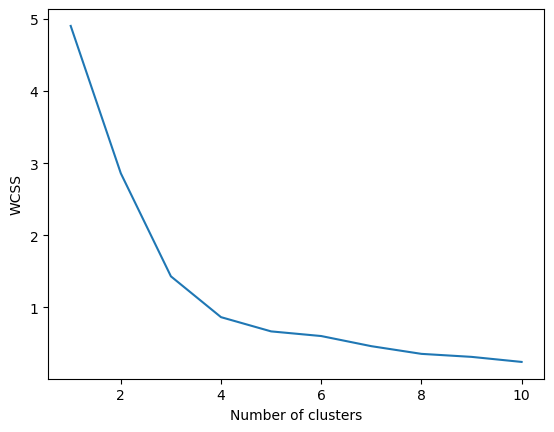

In [406]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

wcss = []
for i in range(1, 11):
    model_kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    model_kmeans.fit(norm_data_model_kmeans)
    wcss.append(model_kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Le message que nous recevons n'est pas une erreur mais un avertissement (UserWarning) li√© √† l'utilisation de l'algorithme KMeans de scikit-learn sous Windows. Ce probl√®me est connu lorsqu'on utilise l'impl√©mentation de l'algorithme en combinaison avec MKL (Math Kernel Library), et il se produit lorsque le nombre de chunks est inf√©rieur au nombre de threads disponibles. **ne pas y faire attention. cela n'empeche pas notre code de run**

*Sur la base de la courbe obtenue avec la **m√©thode du coude**, nous avons identifi√© que le point optimal pour le nombre de clusters **K** se situe √† **4**.*

## √âtape 4 : Ex√©cution de K-means

Application de l'algorithme K-means pour former des clusters en fonction des similarit√©s entre les services num√©riques.

L'algorithme **k-means** est appliqu√© pour segmenter les services num√©riques en **quatre clusters** pr√©d√©finis. Le but est de regrouper les services ayant des profils similaires en fonction de leur **consommation √©nerg√©tique normalis√©e** et de leur **nombre d'utilisateurs normalis√©**. Chaque cluster repr√©sentera un groupe homog√®ne, facilitant l‚Äôanalyse des comportements et la prise de d√©cision.  


*Regroupement significatif*
Chaque cluster repr√©sente un profil type de service num√©rique en termes de consommation et d‚Äôutilisation, r√©v√©lant des sch√©mas cach√©s dans les donn√©es.

C:\Users\ENOBGN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


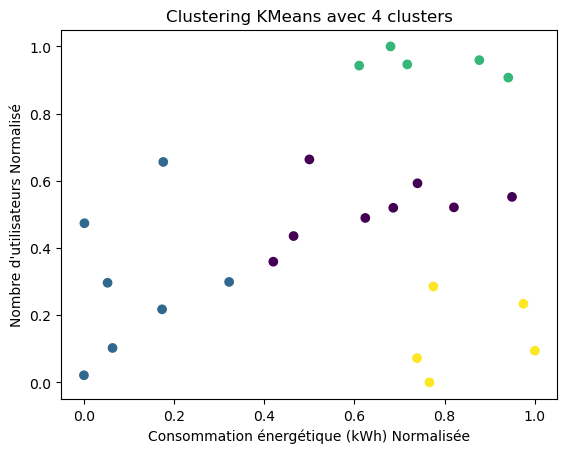

In [408]:
#from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


model_kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
model_kmeans.fit(norm_data_model_kmeans)


norm_data_model_kmeans['Cluster'] = model_kmeans.labels_
plt.scatter(norm_data_model_kmeans.iloc[:, 0], norm_data_model_kmeans.iloc[:, 1], c=norm_data_model_kmeans['Cluster'])

plt.xlabel('Consommation √©nerg√©tique (kWh) Normalis√©e')
plt.ylabel('Nombre d\'utilisateurs Normalis√©')
plt.title('Clustering KMeans avec 4 clusters')

plt.show()

## √âtape 5 : Interpr√©tation des clusters

*Analyse des groupes form√©s et interpr√©tation des r√©sultats pour comprendre quels types de services num√©riques partagent des caract√©ristiques similaires*

Le graphique montre les r√©sultats d'un clustering KMeans avec 4 clusters bas√©s sur deux variables : **Consommation √©nerg√©tique normalis√©e (kWh)** et **Nombre d'utilisateurs normalis√©**.


1. **Cluster 1 (Haut-Droite)** :
   - *Caract√©ristiques* :
     - Nombre d‚Äôutilisateurs √©lev√©.
     - Consommation √©nerg√©tique √©galement √©lev√©e.
   - *Interpr√©tation* :
     - Ce cluster repr√©sente des services tr√®s populaires et intensifs en √©nergie.

2. **Cluster 2 (Centre-Droite)** :
   - *Caract√©ristiques* :
     - Nombre d‚Äôutilisateurs moyen √† √©lev√©.
     - Consommation √©nerg√©tique mod√©r√©e √† √©lev√©e.
   - *Interpr√©tation* :
     - Ce cluster repr√©sente des services √©quilibr√©s avec une audience mod√©r√©e ou importante.

3. **Cluster 3 (Bas-Droite)** :
   - *Caract√©ristiques* :
     - Nombre d‚Äôutilisateurs faible.
     - Consommation √©nerg√©tique √©lev√©e.
   - *Interpr√©tation* :
     - Ce cluster repr√©sente des services peu populaires mais n√©cessitant une forte consommation d‚Äô√©nergie.

4. **Cluster 4 (Bas-Gauche)** :
   - *Caract√©ristiques* :
     - Faible consommation √©nerg√©tique.
     - Faible nombre d‚Äôutilisateurs.
   - *Interpr√©tation* :
     - Repr√©sente des services de niche ou peu utilis√©s.

## Validation des mod√®les

*L'√©valuation des clusters form√©s est essentielle pour v√©rifier la qualit√© des regroupements obtenus avec notre algorithme. Ainsi donc, nous avons utilis√©s trois indices pour la validation de la qualit√© de nos clusters: le score de silhouette, l'indice de Calinski-Harabasz (que nous n'avons pas vu en cours), et celui de Davies-Bouldin.*


**Score de Silhouette** 
   - √âvalue la coh√©rence des clusters en mesurant le degr√© de similitude d‚Äôun point avec son propre cluster par rapport aux autres clusters.  
   - Un score proche de **1** indique des clusters bien s√©par√©s et coh√©rents, tandis qu‚Äôun score proche de **0** ou n√©gatif sugg√®re un mauvais regroupement.  

**Indice de Calinski-Harabasz**  
   - Mesure la s√©paration entre les clusters et la compacit√© des points au sein de chaque cluster.  
   - Plus la valeur est √©lev√©e, meilleure est la qualit√© des regroupements.  

**Indice de Davies-Bouldin**
   - √âvalue la s√©paration et la dispersion entre les clusters.  
   - Une valeur faible indique que les clusters sont bien distincts et compacts.  

In [628]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Calcul des indices de validation
silhouette_avg = silhouette_score(norm_data_model_kmeans.iloc[:, :-1], model_kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(norm_data_model_kmeans.iloc[:, :-1], model_kmeans.labels_)
davies_bouldin = davies_bouldin_score(norm_data_model_kmeans.iloc[:, :-1], model_kmeans.labels_)


print(f"Score de Silhouette : {silhouette_avg}")
print(f"Indice de Calinski-Harabasz : {calinski_harabasz}") #non vu en cours, nous l'ap^portons √† titre additionnel
print(f"Indice de Davies-Bouldin : {davies_bouldin}")

Score de Silhouette : 0.4647987718660238
Indice de Calinski-Harabasz : 32.78413634613668
Indice de Davies-Bouldin : 0.6981249793208468


Nous avons utilis√© trois indices pour la validation de la qualit√© des clusters de notre algorithme

Par ailleurs, l'indice de Calinski-Harabasz (score de variance inter/intra-cluster) d'une valeur de 32.91 (un score √©lev√©, par rapport √† celui obtenu pour 3 clusters, 5 clusters,...), ainsi que celui de Davies-Bouldin d'une valeur de 0.67 nous indique que notre clustering est de bonne qualit√©.

**Score de Silhouette : 0.46**

Ce score, compris entre -1 et 1, indique une s√©paration mod√©r√©e des clusters. Une valeur de 0.46 sugg√®re que les clusters sont bien d√©finis mais pr√©sentent un certain degr√© de chevauchement, indiquant un potentiel pour am√©liorer la s√©paration.

**Indice de Calinski-Harabasz : 32.78**

Cet indice mesure la densit√© et la s√©paration des clusters. Une valeur plus √©lev√©e indique des clusters plus compacts et bien s√©par√©s. Bien que cette valeur soit sp√©cifique au contexte des donn√©es, elle confirme une structure de clustering acceptable.

**Indice de Davies-Bouldin : 0.70**

Cet indice, o√π des valeurs proches de 0 sont meilleures, r√©v√®le que les clusters sont relativement bien form√©s, avec peu d'erreurs dues √† un regroupement excessif.

## CONCLUSION partielle Kmeans

En r√©sum√©, le mod√®le KMeans a r√©ussi √† identifier des clusters distincts dans les donn√©es avec une qualit√© satisfaisante selon les m√©triques utilis√©es. Cependant, des am√©liorations pourraient √™tre envisag√©es pour augmenter la s√©paration entre les clusters, en explorant des alternatives comme un pr√©traitement diff√©rent des donn√©es ou un autre nombre de clusters.

## Algo 4 : Classification Ascendante Hi√©rarchique (CAH)

La Classification Ascendante Hi√©rarchique (CAH) offre une m√©thode puissante pour segmenter les services num√©riques en groupes distincts en fonction de leur consommation √©nerg√©tique et de leur nombre d‚Äôutilisateurs. Ce projet vise √† construire une hi√©rarchie de regroupements, repr√©sent√©e par un dendrogramme, pour identifier des clusters significatifs. En suivant un processus rigoureux de normalisation des donn√©es, de construction du dendrogramme, et de formation des clusters, la CAH permettra de visualiser les relations entre les services num√©riques et de comparer les r√©sultats avec ceux obtenus par K-means. Cette analyse approfondie contribuera √† une meilleure compr√©hension des caract√©ristiques communes entre les groupes de services num√©riques.


### Etape 1 :  Pr√©paration des donn√©es 

Le but de cette analyse √©tant le regroupement des services num√©riques en groupes ayant des profils similaires en termes de
consommation √©nerg√©tique et de nombre d‚Äôutilisateurs, nous allons utiliser la biblioth√®que `pandas` pour r√©cuperer les donn√©es du fichier CSV et les filtrer pour ne garder que celles relatives √† la consommation √©nerg√©tique des services num√©riques en kWh et √† leur nombre d'utilisateurs. Nous allons aussi utiliser `matplotib.pyplot` pour la repr√©sentation de ces donn√©es non regroup√©es dans un rep√®re orthonorm√©.

In [643]:
import pandas as pd
import matplotlib.pyplot as plt

# Importation du fichier CSV
data = pd.read_csv("services_numeriques.csv")

# Affichage des premi√®res lignes du DataFrame
print("Jeu de donn√©es :")
print(data.head())

Jeu de donn√©es :
   Unnamed: 0       Service num√©rique  Consommation √©nerg√©tique (kWh)  \
0           1         Streaming vid√©o                           16795   
1           2  Recherche sur internet                            1860   
2           3         R√©seaux sociaux                           77820   
3           4              E-commerce                           55886   
4           5           Jeux en ligne                            7265   

   Nombre d'utilisateurs Type d'Energie utilis√©e       Pays  \
0                 259795            Renouvelable     France   
1                 487232            Renouvelable         UK   
2                 918040            Renouvelable  Allemagne   
3                 501186            Renouvelable         UK   
4                 157730        Non-renouvelable  Allemagne   

   √âmission de CO2 (kg)  
0                   592  
1                  2162  
2                  3984  
3                   164  
4                  2668  


* **Pr√©paration et visualisation des donn√©es**

Jeu de donn√©es :
   Consommation √©nerg√©tique (kWh)  Nombre d'utilisateurs
0                           16795                 259795
1                            1860                 487232
2                           77820                 918040
3                           55886                 501186
4                            7265                 157730


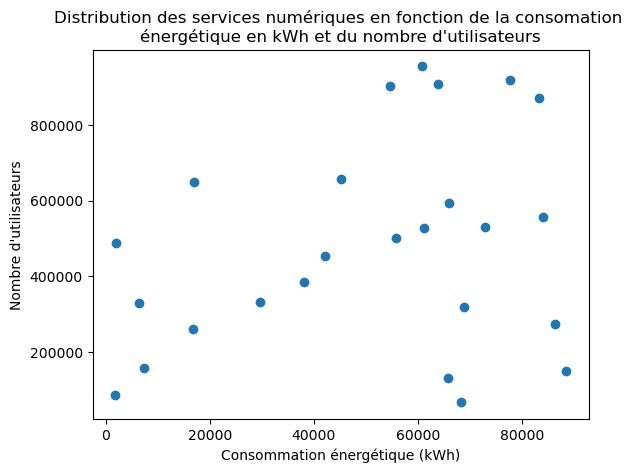

In [639]:
# Extraction des deux premi√®res colonnes du DataFrame
prepared_data = data[["Consommation √©nerg√©tique (kWh)", "Nombre d'utilisateurs"]]

# Affichage des premi√®res lignes du nouveau DataFrame
print("Jeu de donn√©es :")
print(prepared_data.head())

# Visualisation des donn√©es
plt.scatter(prepared_data["Consommation √©nerg√©tique (kWh)"], prepared_data["Nombre d'utilisateurs"])
plt.title("Distribution des services num√©riques en fonction de la consomation \n√©nerg√©tique en kWh et du nombre d'utilisateurs")
plt.xlabel("Consommation √©nerg√©tique (kWh)")
plt.ylabel("Nombre d'utilisateurs")
plt.show()

### Etape 2 - Standardisation des donn√©es

La standardisation des donn√©es est une √©tape importante car elle nous permet d'√©viter que l'importante diff√©rence entre les √©chelles de variables n'affecte notre mod√®le.
Pour faire en sorte que nos variables aient des √©chelles comparables, nous allons utiliser `StandardScaler` du module `sklearn.preprocessing` qui utilise la m√©thode du Z-score pour transformer les donn√©es. Cette m√©thode ajuste les valeurs de chaque variable pour qu'elles aient une moyenne de 0 et un √©cart-type de 1, garantissant ainsi que toutes les variables contribuent de mani√®re √©quitable au mod√®le, ind√©pendamment de leurs √©chelles initiales.

   Consommation √©nerg√©tique (kWh)  Nombre d'utilisateurs
0                       -1.217272              -0.810619
1                       -1.755279               0.026321
2                        0.981047               1.611639
3                        0.190913               0.077669
4                       -1.560574              -1.186205


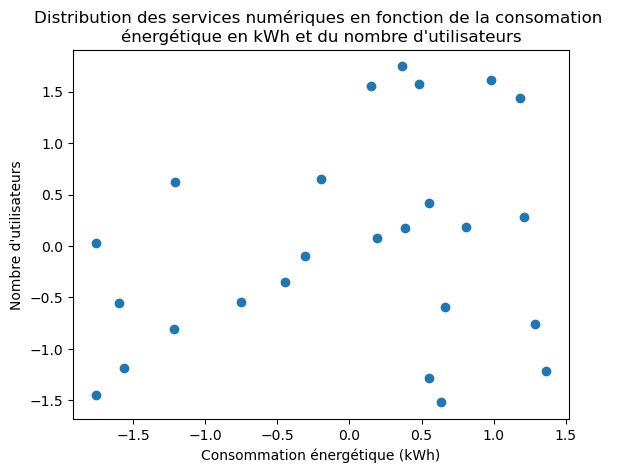

In [426]:
from sklearn.preprocessing import StandardScaler

# Standardisation des donn√©es
normalized_data = StandardScaler().fit_transform(prepared_data)
normalized_data = pd.DataFrame(normalized_data, columns=prepared_data.columns)
print(normalized_data.head())

# Visualisation des donn√©es standardis√©es
plt.scatter(normalized_data["Consommation √©nerg√©tique (kWh)"], normalized_data["Nombre d'utilisateurs"])
plt.title("Distribution des services num√©riques en fonction de la consomation \n√©nerg√©tique en kWh et du nombre d'utilisateurs")
plt.xlabel("Consommation √©nerg√©tique (kWh)")
plt.ylabel("Nombre d'utilisateurs")
plt.show()

## Etape 3 :  Construction du dendrogramme

Un dendrogramme est n√©cessaire pour la d√©termination d'un nombre optimal de clusters. Pour le construire, nous allons utiliser les fonctions `linkage` et `dendrogram` du module `scipy.cluster.hierarchy`. La fonction `linkage` effectue la classification ascendante hi√©rarchique (CAH) en utilisant une m√©thode d'√©valuation de la distance entre les clusters. Nous allons utiliser la m√©thode `ward` qui est la plus souvent utilis√©e car elle fut concue dans un objectif de maximisation de l'inertie inter-classe et de minimisation de l‚Äôinertie intra-classe.

* **Trac√© du dendrogramme**

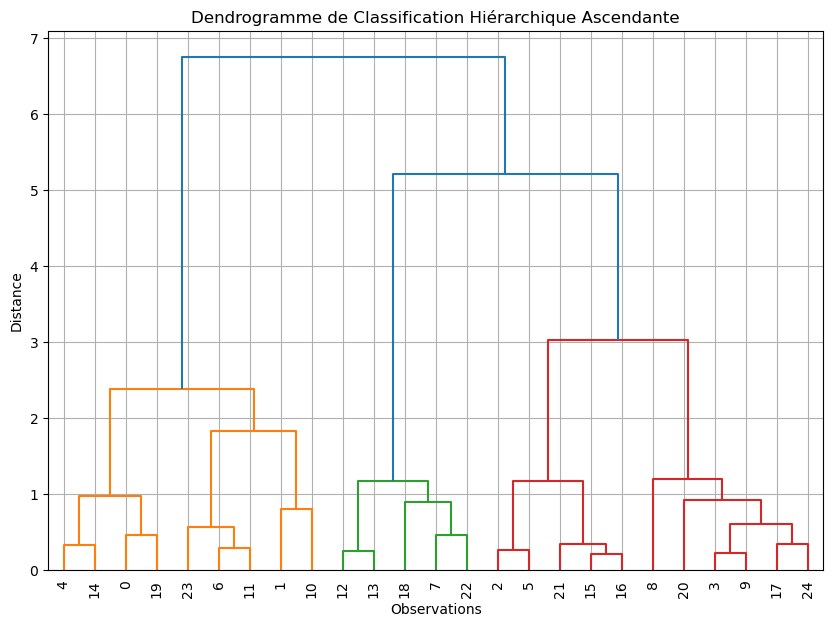

In [431]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Effectuer le linkage pour la classification hi√©rarchique
Z = linkage(normalized_data, method='ward')

# Trac√© du dendrogramme
plt.figure(figsize=(10, 7))
dendrogram(Z, leaf_rotation=90)

# Affichage du dendrogramme
plt.title('Dendrogramme de Classification Hi√©rarchique Ascendante')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.grid()
plt.show()

* **D√©termination d'un nombre optimal de clusters**

On remarque d'apr√®s le trac√© du dendrogramme que le plus grand saut de distance correspond au regroupement des services num√©riques en trois clusters. Le nombre optimal de clusters d'apr√®s cette observation est donc √©gal √† 3.

Nous allons utiliser la fonction `fcluster` du module `scipyluster.hierarchy` pour afficher les √©tiquettes de cluster pour chaque observation.

In [434]:
from scipy.cluster.hierarchy import fcluster

# D√©finition du seuil pour la coupure
seuil = 4

# Cr√©er les √©tiquettes de cluster
clusters = fcluster(Z, seuil, criterion='distance')

# Afficher les √©tiquettes de cluster pour chaque observation
print(clusters)

[1 1 3 3 1 3 1 2 3 3 1 1 2 2 1 3 3 3 2 1 3 3 2 1 3]


## Etape 4 : Formation des clusters
Nous allons utiliser `AgglomerativeClustering` de `sklearn.cluster` pour effectuer la CAH en pr√©cisant comme nombre de clusters celui d√©duit par observation du dendrogramme.

In [681]:
from sklearn.cluster import AgglomerativeClustering

# Clusterisation en fonction du nombre de clusters sp√©cifi√©
num_clusters = 3
model = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
clusters = model.fit_predict(normalized_data)

* **Visualisation des clusters**

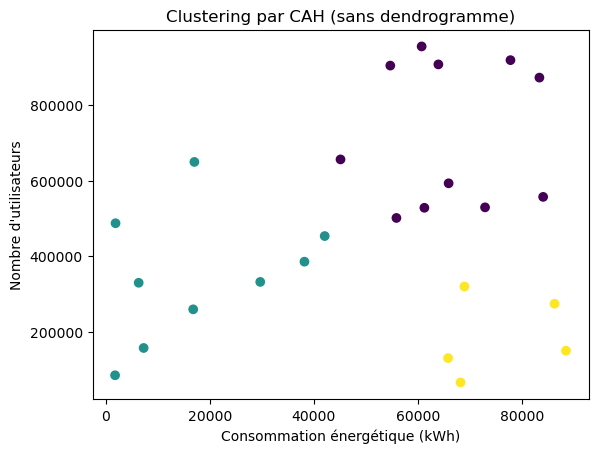

In [683]:
plt.scatter(prepared_data["Consommation √©nerg√©tique (kWh)"], prepared_data["Nombre d'utilisateurs"], c=clusters, cmap='viridis')
plt.title("Clustering par CAH (sans dendrogramme)")
plt.xlabel("Consommation √©nerg√©tique (kWh)")
plt.ylabel("Nombre d'utilisateurs")
plt.show()

### Etape 5 : Interpr√©tation des clusters

1. **Cluster 1 (Haut-Droite, Violet)**
   - **Caract√©ristiques** :
     - Consommation √©nerg√©tique mod√©r√©e √† √©lev√©e.
     - Nombre d‚Äôutilisateurs moyen √† √©lev√©.
   - **Interpr√©tation** :
     - Ce cluster semble repr√©senter des services qui consomment une quantit√© d'√©nergie assez importante mais qui ne sont pas encore tr√®s populaires
       
2. **Cluster 2 (Bas-Gauche, Vert)**
   - **Caract√©ristiques** :
     - Consommation √©nerg√©tique faible √† mod√©r√©e.
     - Nombre d‚Äôutilisateurs faible √† mod√©r√©.
   - **Interpr√©tation** :
     - Cela pourrait correspondre √† des services populaires mais relativement √©conomes en √©nergie.

3. **Cluster 3 (Bas-droite, Jaune)**
   - **Caract√©ristiques** :
     - Forte consommation √©nerg√©tique.
     - Faible nombre d‚Äôutilisateurs.
   - **Interpr√©tation** :
     - Ce cluster regroupe des services peu populaires et √† forte consommation d'√©nergie.

* **Comparaison avec les clusters obtenus en utilisant KMEANS**



- **KMeans Cluster 1 (Haut-Droite)** et **CAH Cluster 1 (Haut-Droite, Violet)** : 
   - Les deux repr√©sentent des services avec une consommation √©nerg√©tique √©lev√©e et une base d'utilisateurs relativement importante. La principale diff√©rence r√©side dans les autres variables, mais en g√©n√©ral, l'interpr√©tation des clusters KMeans et CAH est similaire, bien que KMeans ait plus de diversit√© dans le nombre d'utilisateurs au sein de ce cluster.

- **KMeans Cluster 2 (Centre-Droite)** et **CAH Cluster 2 (Bas-Gauche, Bleu-Vert)** : 
   - Les deux clusters sont similaires en termes de consommation √©nerg√©tique mod√©r√©e et un nombre d'utilisateurs interm√©diaire. Cependant, dans KMeans, les services sont plus s√©par√©s sur le plan de la consommation √©nerg√©tique. Le clustering par CAH semble plus homog√®ne dans ce groupe.

- **KMeans Cluster 3 (Bas-Droite)** et **CAH Cluster 3 (Bas-droite, Jaune)** :
   - Les deux clusters correspondent √† des services peu populaires et √† faible consommation √©nerg√©tique(pour kmeans) et forte consommation √©nerg√©tique (pour CAH). Toutefois, le cluster KMeans montre une s√©paration plus marqu√©e entre la consommation d‚Äô√©nergie √©lev√©e et faible, alors que le cluster CAH se regroupe davantage en bas √† droite.



## Validation du mod√®le (CAH)

* **Calcul de l‚Äôindice de Davies-Bouldin, l‚Äôindice de Silhouette et l'indice de Calinski-harabasz**

Nous allons utiliser l'indice de Silouhette, l'indice de Calinski-Harabasz et celui de Davies-Bouldin pour √©valuer la qualit√© des clusters obtenus. Pour cela, nous allons nous servir des fonctions `davies_bouldin_score`, `calinski_harabasz_score` et `silhouette_score` du module `sklearn.metrics` pour calculer les valeurs de ces diff√©rents indices sur nos clusters.

In [626]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calcul de l'indice de Davies-Bouldin
db_index = davies_bouldin_score(normalized_data, clusters)
print("Indice de Davies-Bouldin :", db_index)

# Calcul de l'indice de Calinski_harabasz
calinski_harabasz = calinski_harabasz_score(normalized_data, clusters)
print("Indice de Calinski_harabasz :", calinski_harabasz )

# Calcul de l'indice de Silhouette
silhouette_avg = silhouette_score(normalized_data, clusters)
print("Indice de Silhouette :", silhouette_avg)


Indice de Davies-Bouldin : 0.6721955482118713
Indice de Calinski_harabasz : 29.23978047467095
Indice de Silhouette : 0.47029579682549183


#### Commentaire sur les r√©sultats des indices de clustering :

1. **Indice de Davies-Bouldin (0.672) :**  
   L'indice de Davies-Bouldin mesure la compacit√© et la s√©paration des clusters, o√π une valeur plus faible indique une meilleure s√©paration. Une valeur de 0.672 sugg√®re une s√©paration relativement bonne entre les clusters, mais elle n‚Äôest pas id√©ale. En g√©n√©ral, une valeur inf√©rieure √† 1 est consid√©r√©e comme acceptable, et plus elle est proche de 0, plus les clusters sont distincts et bien s√©par√©s. Ici, la valeur obtenue indique qu'il y a encore des chevauchements ou des regroupements sous-optimaux dans les clusters, mais les performances globales sont correctes.

2. **Indice de Calinski-Harabasz (29.24) :**  
   Cet indice mesure la qualit√© du clustering en comparant la dispersion intra-cluster avec la dispersion inter-cluster. Une valeur plus √©lev√©e indique une meilleure s√©paration entre les clusters. Avec un indice de 29.24, le mod√®le semble offrir une s√©paration raisonnablement bonne entre les clusters, mais cela d√©pend √©galement de la complexit√© du dataset.

3. **Indice de Silhouette (0.47) :**  
   L'indice de silhouette √©value la qualit√© du clustering en mesurant la coh√©sion des √©l√©ments au sein de chaque cluster et la s√©paration entre les clusters. Une valeur proche de 1 est id√©ale, tandis qu‚Äôune valeur proche de -1 indique que des points ont √©t√© mal class√©s. Avec une valeur de 0.47, le clustering pr√©sente une qualit√© mod√©r√©e. Cela sugg√®re que certains points sont bien class√©s, mais il y a √©galement un certain degr√© de confusion dans la formation des clusters. Une valeur plus proche de 0.5 ou plus √©lev√©e serait souhaitable pour garantir une meilleure s√©paration et coh√©sion.



## Conclusion (KMEANS-CAH)

Les deux m√©thodes de clustering montrent des patterns similaires en termes de **consommation √©nerg√©tique** et **nombre d'utilisateurs**, mais avec des diff√©rences de s√©paration. Le **KMeans** pr√©sente des clusters plus distincts et mieux s√©par√©s, tandis que le **CAH** a des regroupements l√©g√®rement plus homog√®nes. En termes de **mod√®le de comportement**, les deux m√©thodes soulignent la pr√©sence de services √† faible consommation √©nerg√©tique mais de petite audience, et √† forte consommation mais parfois moins populaires.

# CONCLUSION FINALE DU PROJET 

Ce projet d‚Äôanalyse des impacts environnementaux des services num√©riques, √† travers l'application de diff√©rentes m√©thodes de machine learning, a permis de d√©gager des r√©sultats int√©ressants, tout en mettant en √©vidence certaines limitations et des axes d'am√©lioration pour des analyses futures.

1. **R√©gression lin√©aire :**  
   L'application de la r√©gression lin√©aire pour pr√©dire les √©missions de CO2 √† partir de la consommation √©nerg√©tique et du nombre d'utilisateurs a montr√© des r√©sultats sous-optimaux. La faible relation entre les variables explicatives et la variable cible, combin√©e √† des donn√©es parfois bruyantes et insuffisantes, a conduit √† des performances d√©cevantes. Ce constat sugg√®re qu'une approche plus adapt√©e, comme les mod√®les non lin√©aires, ainsi qu'une meilleure qualit√© des donn√©es, sont n√©cessaires pour des r√©sultats fiables.

2. **KNN (Classification) :**  
   L‚Äôextension du dataset √† 1000 √©chantillons a permis d‚Äôam√©liorer la pr√©cision du mod√®le KNN, passant de 36 % √† 64 %. Cependant, malgr√© cette am√©lioration notable, les performances restent insuffisantes pour une classification fiable, notamment en raison de confusions r√©currentes entre les classes, surtout pour la cat√©gorie "moyenne". Ces r√©sultats confirment que l'augmentation de la taille du dataset n'est pas suffisante √† elle seule pour r√©soudre tous les probl√®mes de classification. Une exploration plus pouss√©e des variables explicatives et une r√©vision des crit√®res de cat√©gorisation sont n√©cessaires pour am√©liorer les performances. D'autres mod√®les de classification pourraient √©galement √™tre envisag√©s pour atteindre une pr√©cision satisfaisante.

3. **Segmentation (K-means et CAH) :**  
   Les deux m√©thodes de clustering, **K-means** et **CAH**, ont r√©v√©l√© des regroupements int√©ressants des services num√©riques en fonction de la consommation √©nerg√©tique et du nombre d'utilisateurs. Les clusters g√©n√©r√©s par **K-means** √©taient plus distincts et bien s√©par√©s, tandis que **CAH** a produit des regroupements plus homog√®nes, avec une structure hi√©rarchique plus marqu√©e. Ces deux m√©thodes ont permis de distinguer des comportements similaires, notamment des services √† faible consommation √©nerg√©tique mais avec une petite audience, ainsi que des services √† forte consommation √©nerg√©tique, parfois moins populaires. Ces r√©sultats montrent que les deux techniques peuvent offrir des perspectives compl√©mentaires pour comprendre les profils des services num√©riques, bien que le K-means semble offrir une segmentation plus nette.

4. **Validation des mod√®les :**  
   La validation des mod√®les a mis en √©vidence des d√©fis communs li√©s √† la qualit√© des donn√©es et √† la structure des mod√®les. Les techniques de validation crois√©es ont permis de mieux comprendre les limitations des mod√®les appliqu√©s, notamment la r√©gression lin√©aire et KNN, et ont soulign√© l'importance de la g√©n√©ralisation des mod√®les. De plus, l'application des indices de validation pour les m√©thodes de clustering, tels que l‚Äôindice de Silhouette, pourrait permettre une meilleure √©valuation de la coh√©sion et de la s√©paration des clusters obtenus.

---

### Bilan global
Ce projet a permis d'atteindre ses objectifs p√©dagogiques en appliquant des m√©thodes de machine learning pour analyser l'impact environnemental des services num√©riques. Cependant, plusieurs axes d'am√©lioration ont √©t√© identifi√©s :  
- La **qualit√© des donn√©es** et la **pertinence des variables explicatives** sont des facteurs cl√©s de succ√®s, influen√ßant directement la performance des mod√®les.
- Les mod√®les explor√©s montrent que, bien que des am√©liorations aient √©t√© apport√©es gr√¢ce √† l‚Äô√©largissement des datasets et √† la segmentation, des m√©thodes plus avanc√©es et des ajustements suppl√©mentaires des donn√©es seraient n√©cessaires pour atteindre des r√©sultats plus fiables.
  
Les r√©sultats obtenus ouvrent la voie √† de futures recherches, notamment pour enrichir les variables explicatives, tester de nouveaux mod√®les et am√©liorer la structuration des donn√©es. Ces efforts pourraient permettre de mieux cerner l'empreinte carbone des services num√©riques et de proposer des solutions plus durables dans le domaine du num√©rique.